In [1]:
%load_ext autoreload
%autoreload 2

import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import IPython
import ipywidgets as ipw

from utils import *
from comparisons import *

c:\Users\ben.hardcastle\Anaconda3\envs\datajoint\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2022-10-30 09:58:51,230][get_config][INFO]: Existing configuration detected. Loading from C:\Users\ben.hardcastle\AppData\Local\datajoint\djsciops\config.yaml...
[2022-10-30 09:59:01,815][INFO]: Connecting bjhardcastle@rds.datajoint.io:3306
[2022-10-30 09:59:02,331][INFO]: Connected bjhardcastle@rds.datajoint.io:3306


In [ ]:
for pair in local_dj_probe_pairs():
        
        print('\n'.join(probe.__repr__() for probe in pair.values()))
        display(
            ipw.VBox([
                ipw.HBox([
                    ipw.Image(
                        value=probe_obj.depth_img.open('rb').read(),
                        format='png',
                        width=400,
                    ) for probe_obj in [pair['local'], pair['dj']]
                ]),
            ])
        )

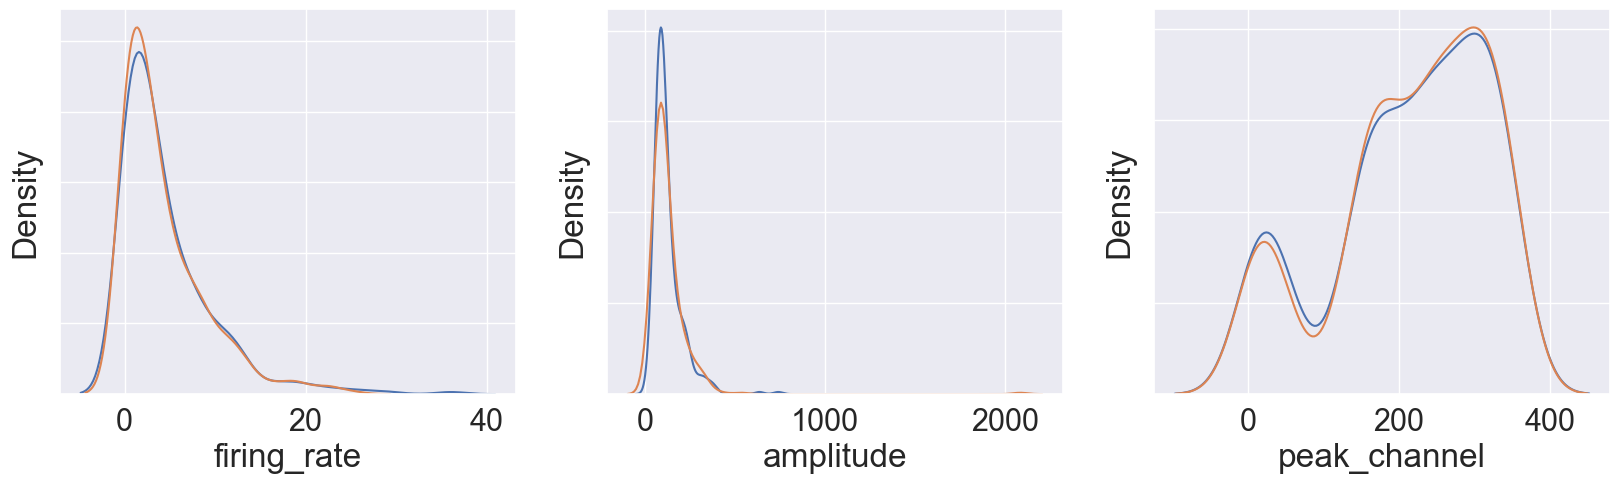

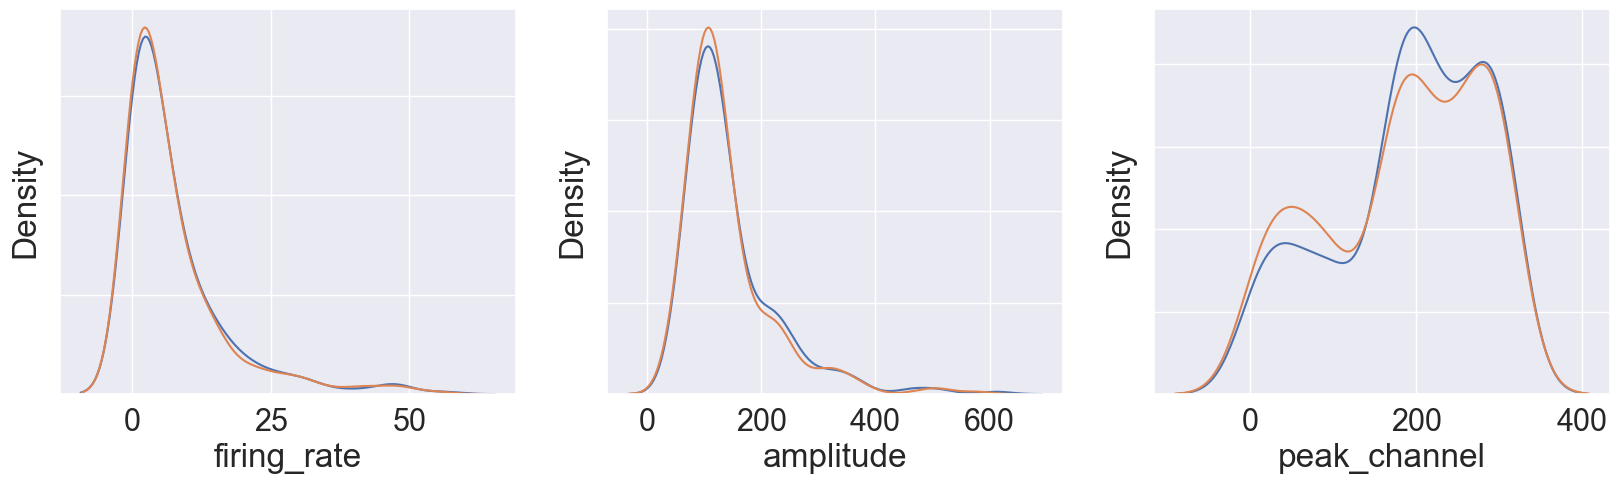

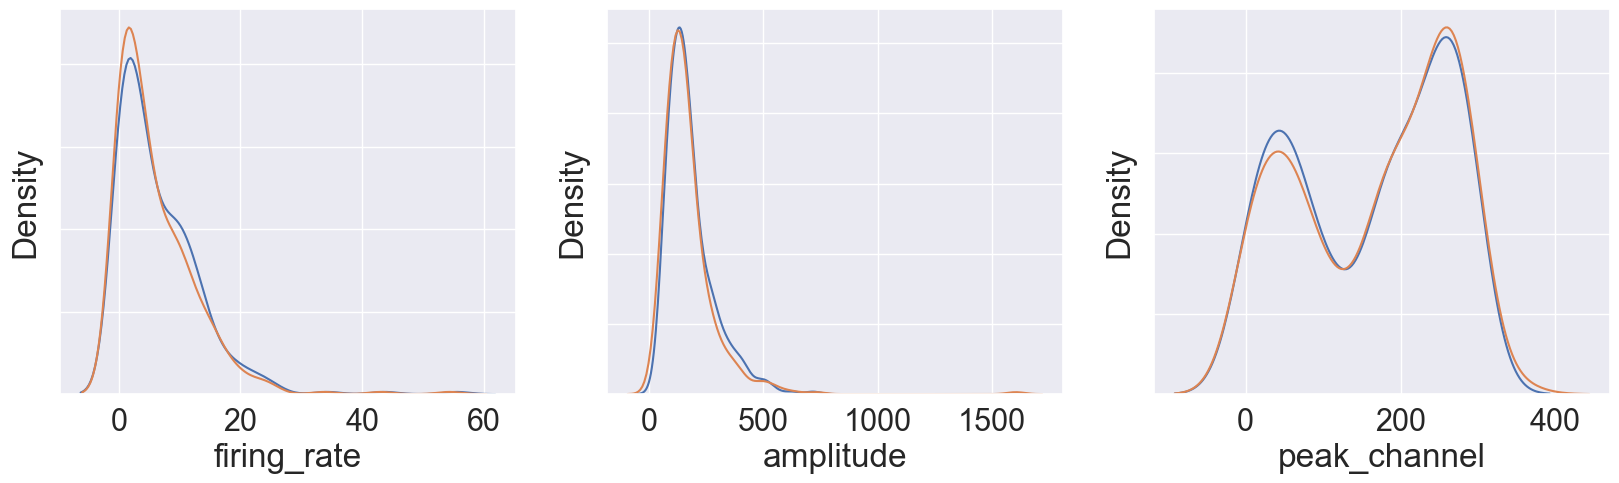

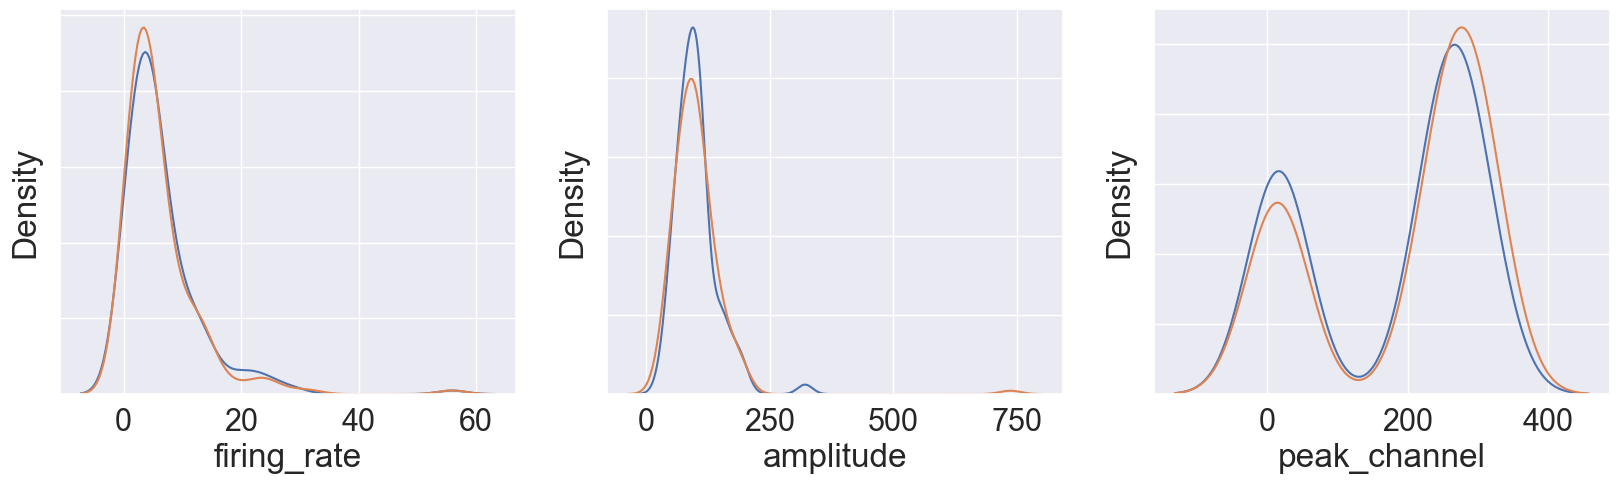

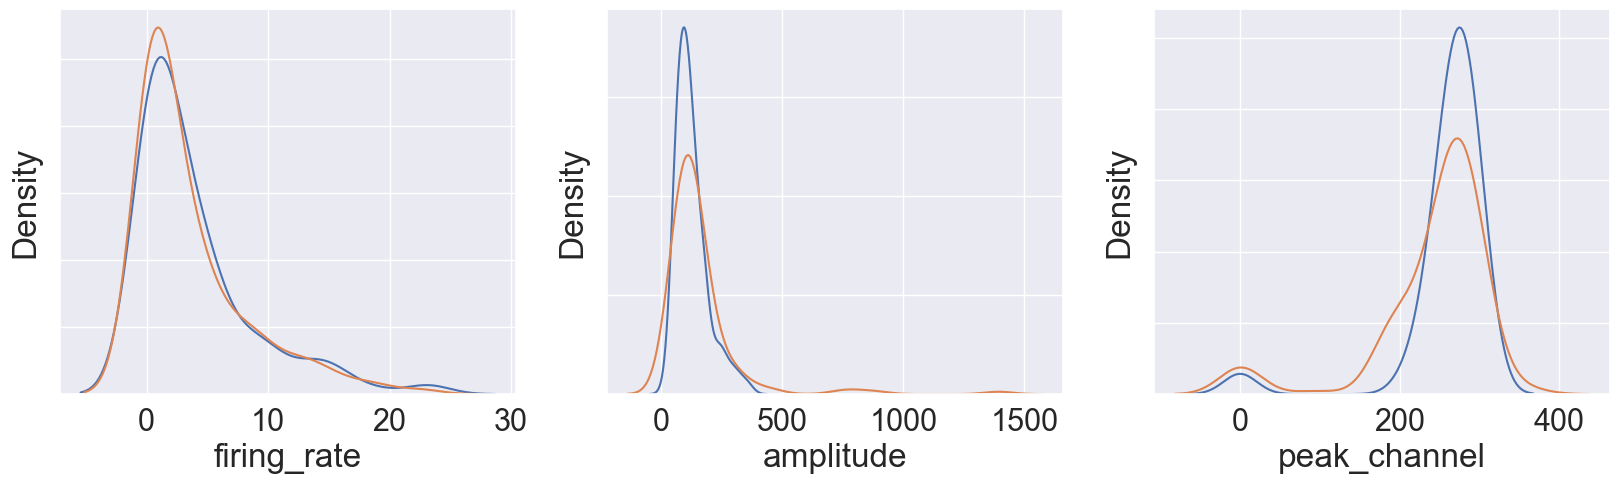

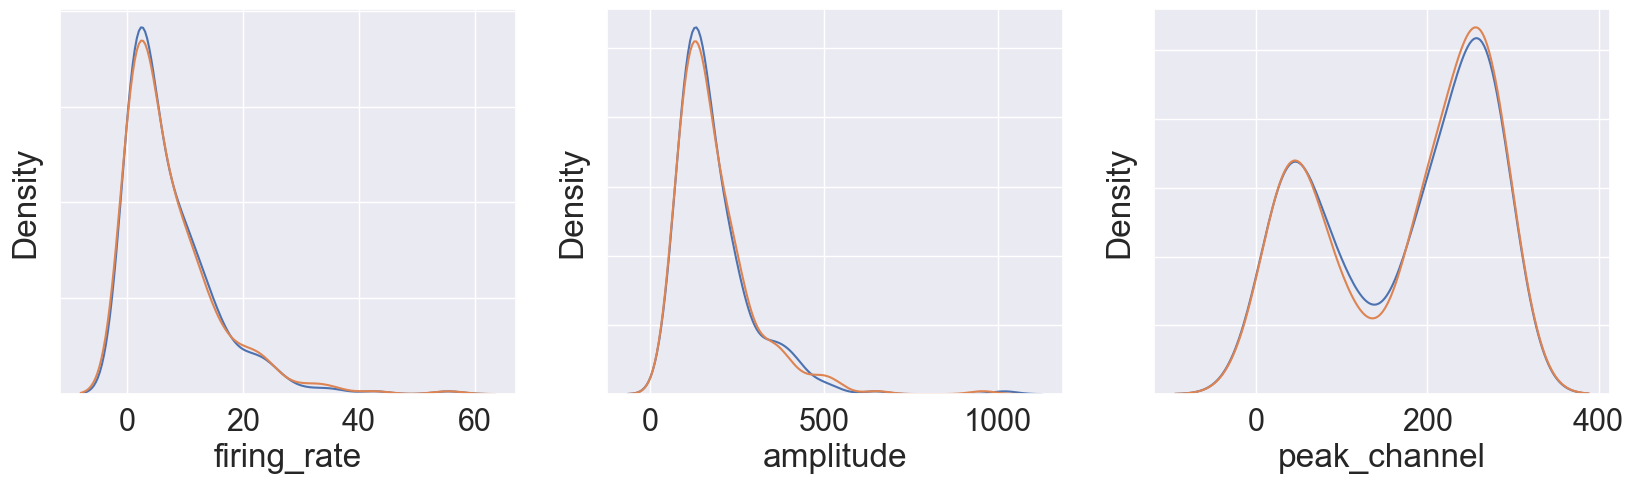

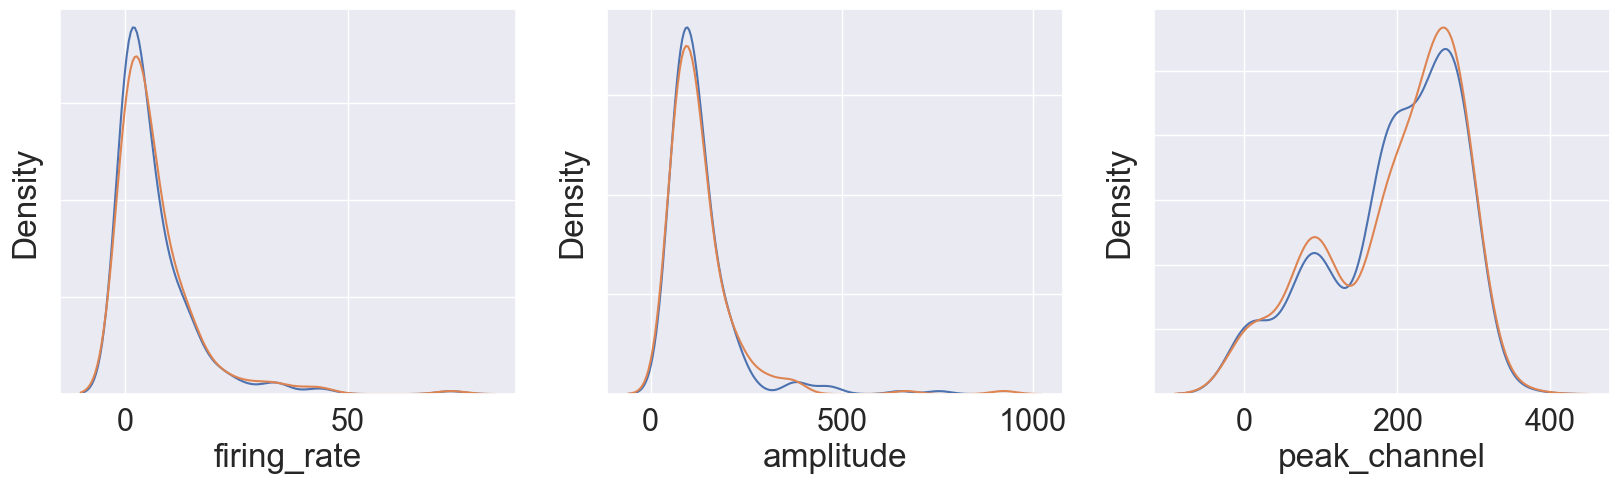

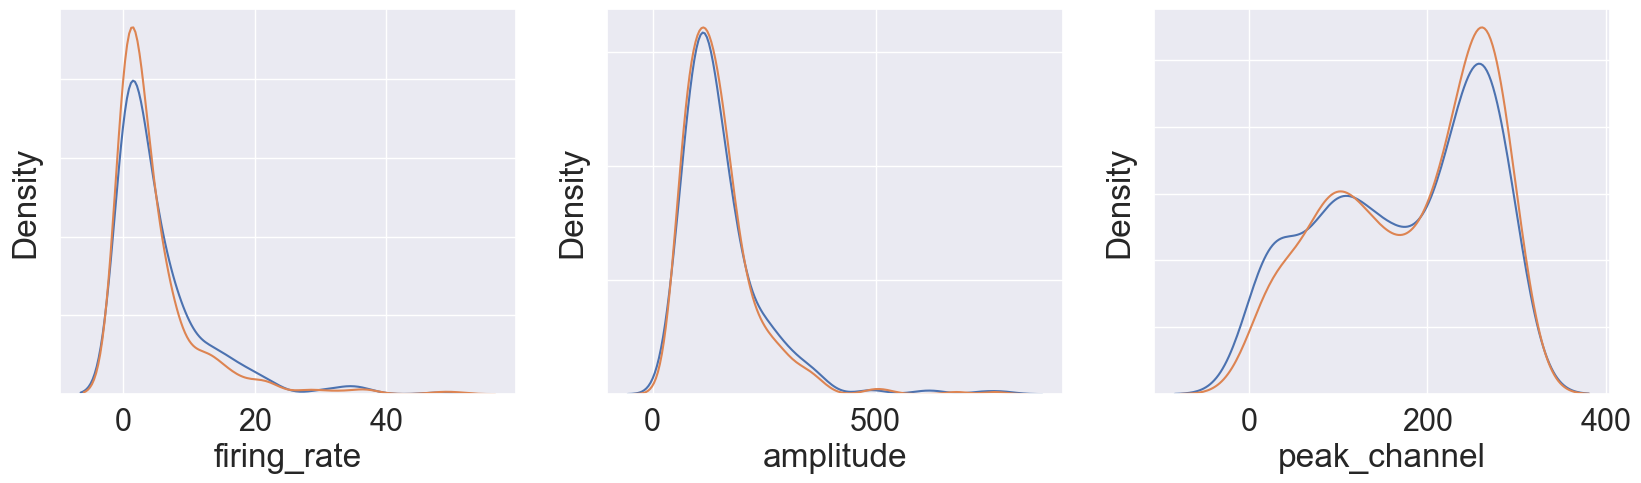

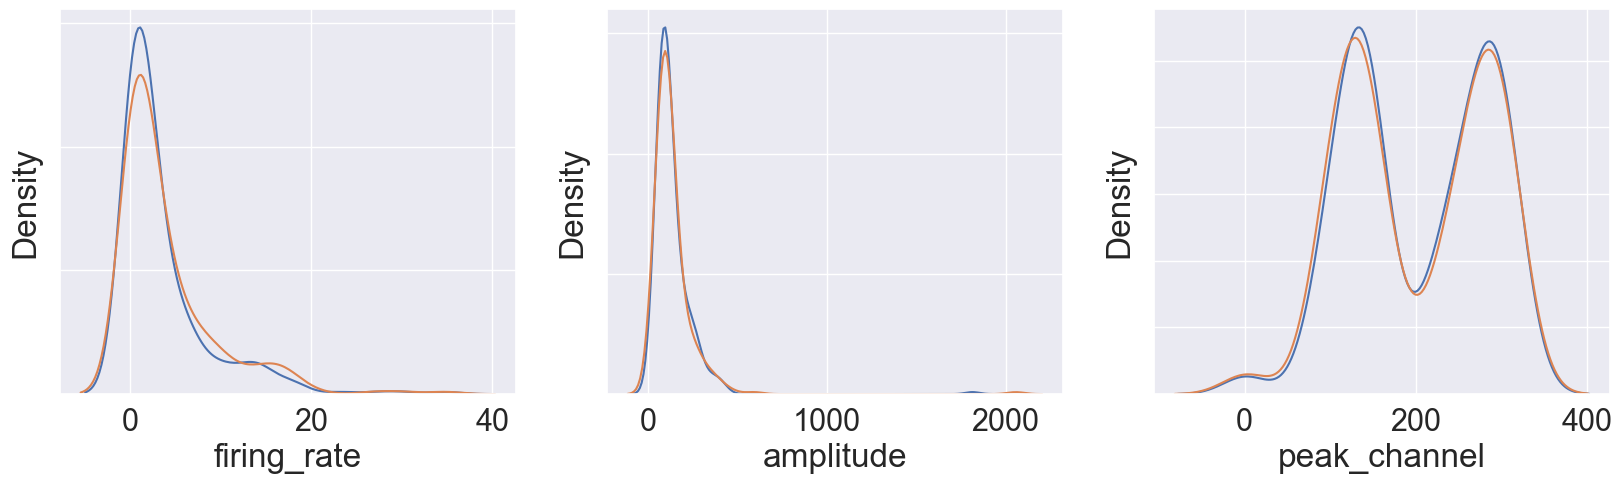

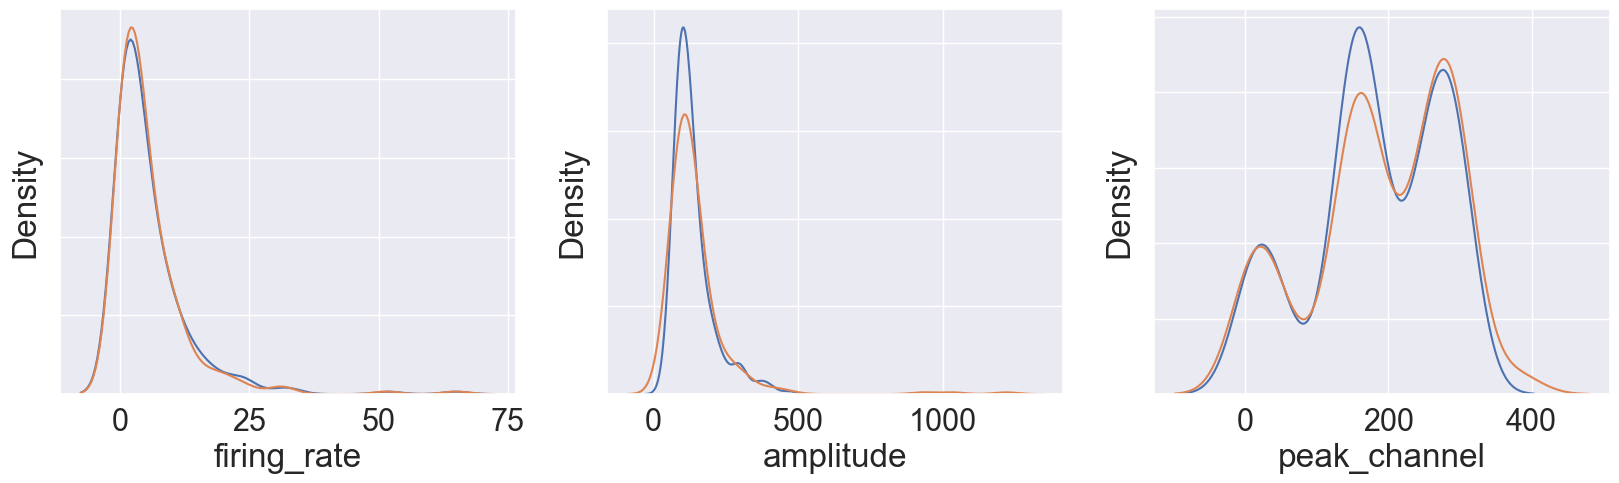

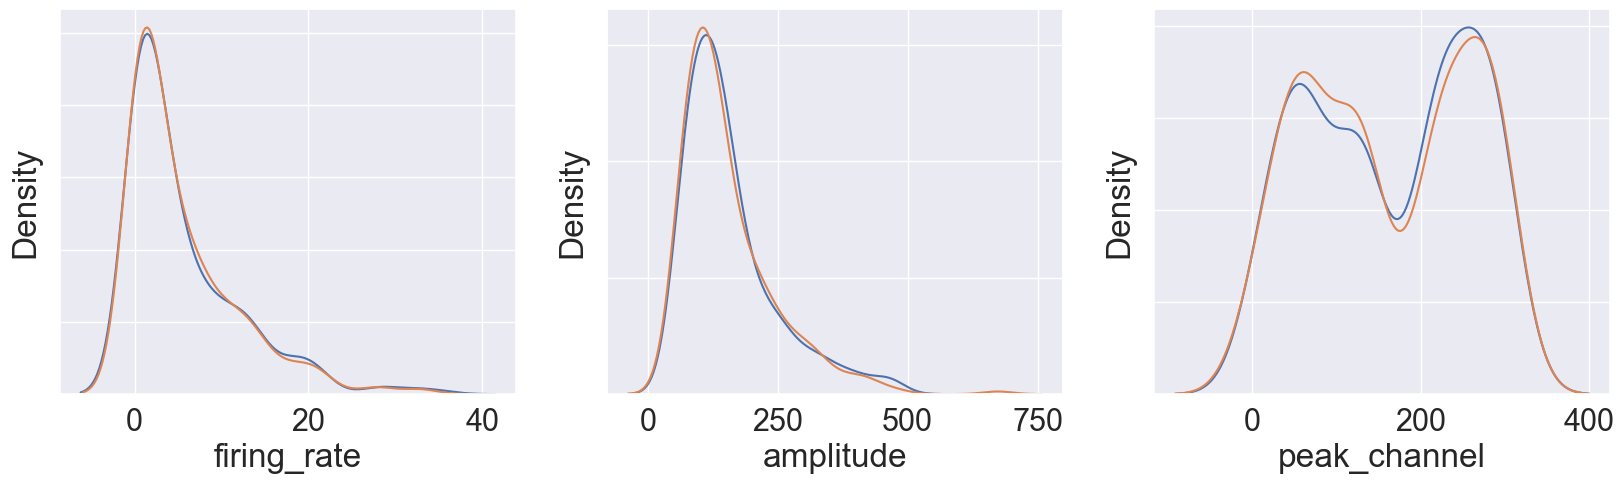

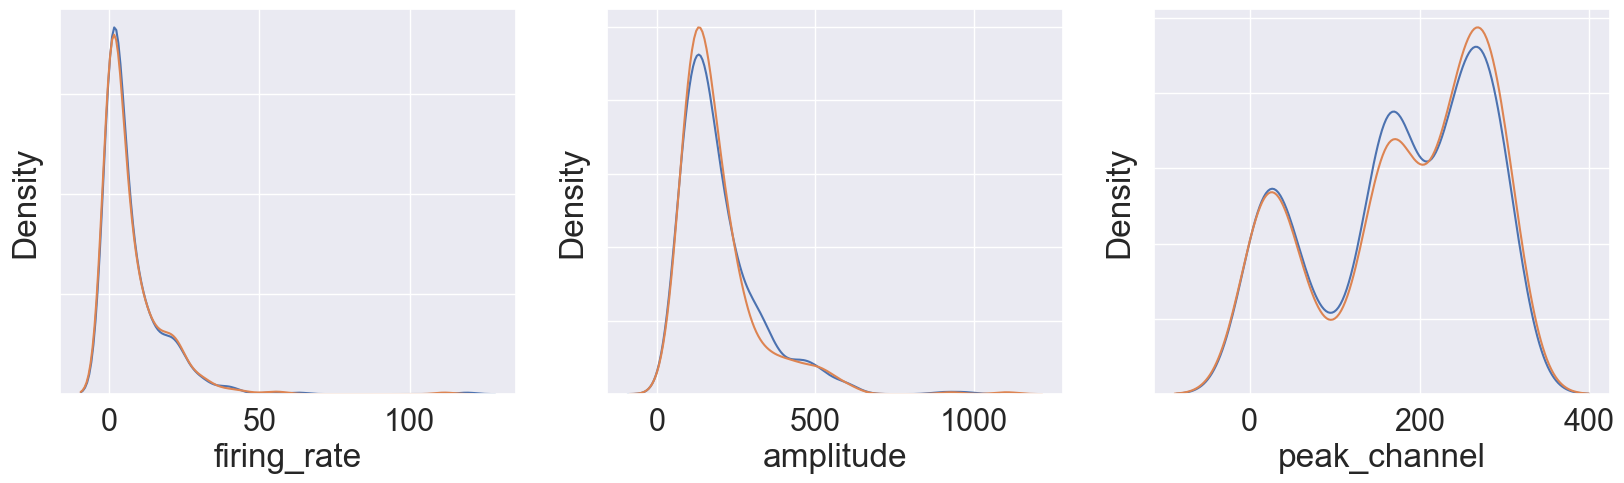

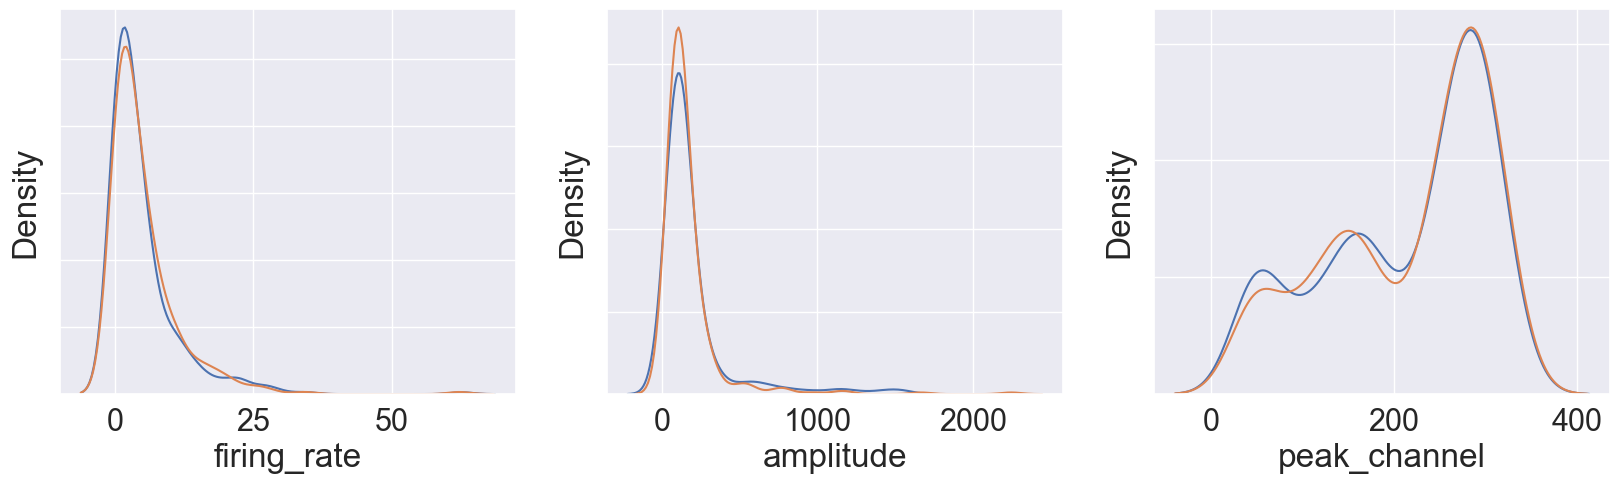

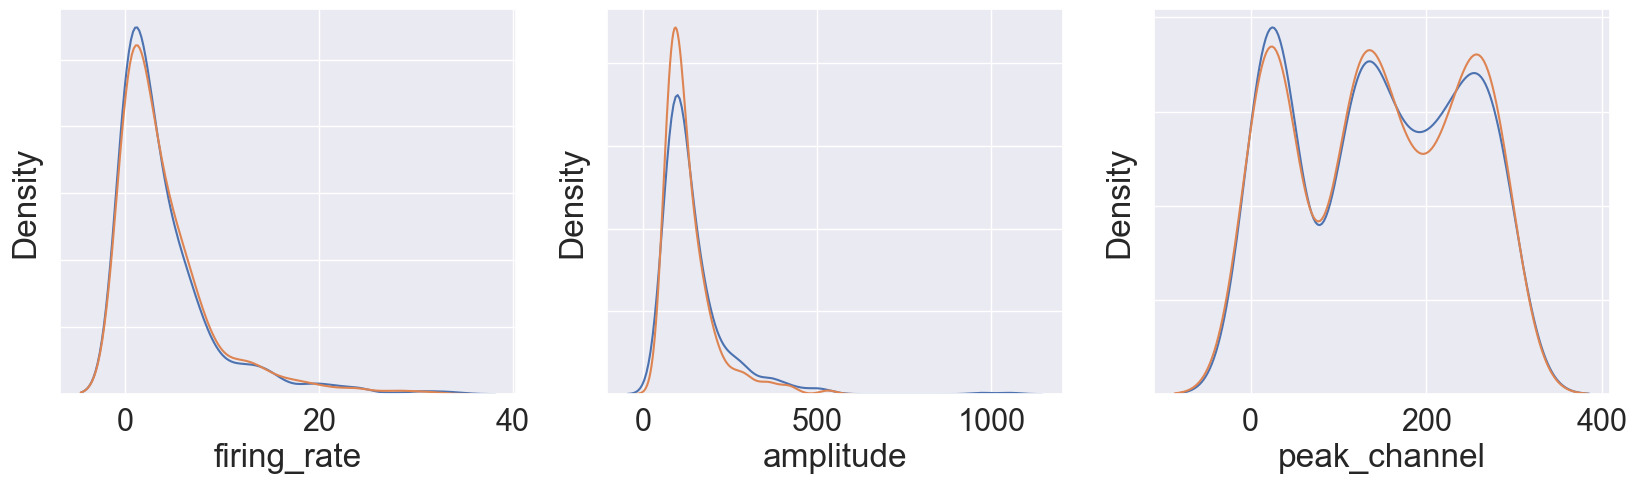

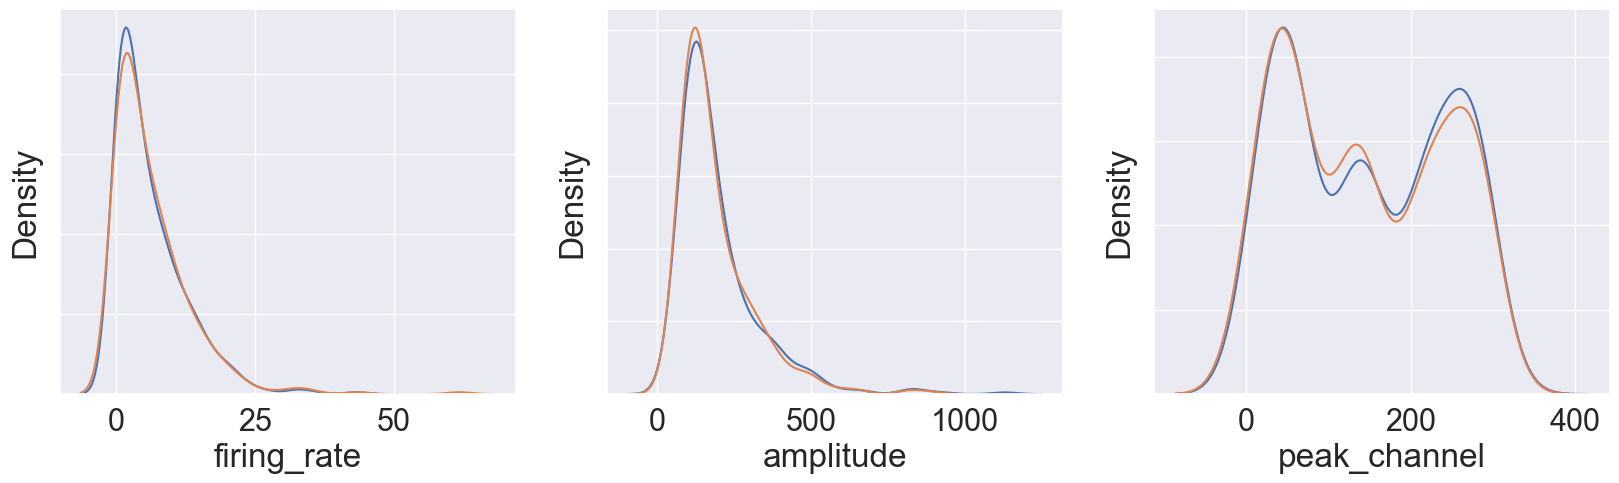

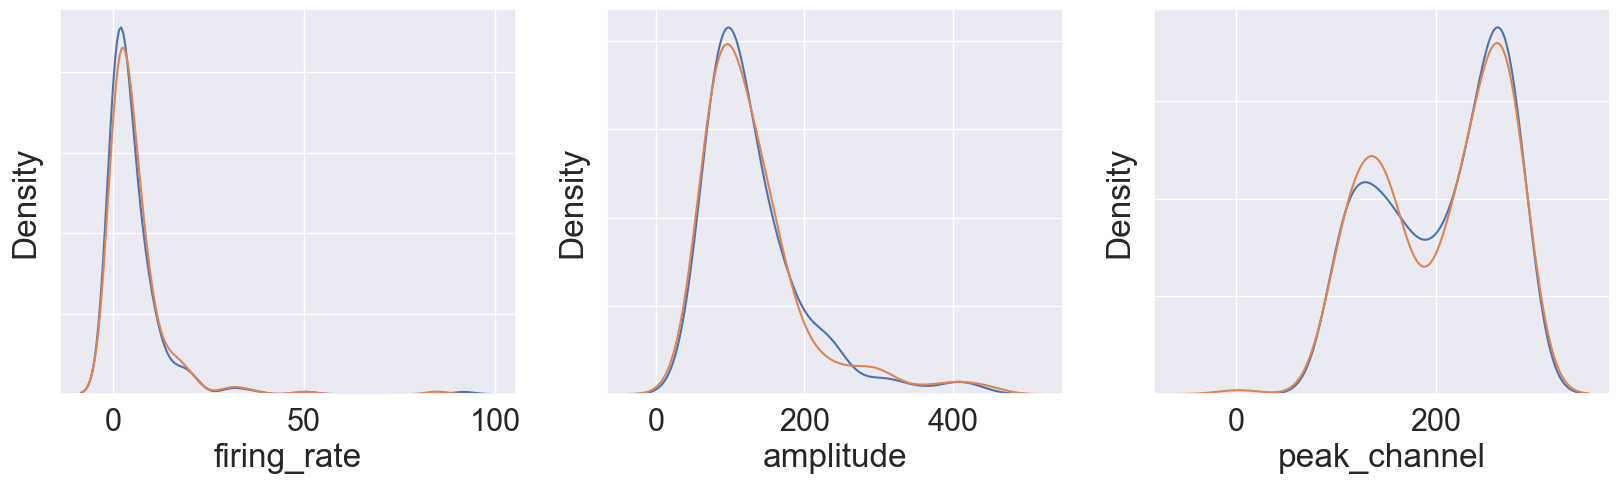

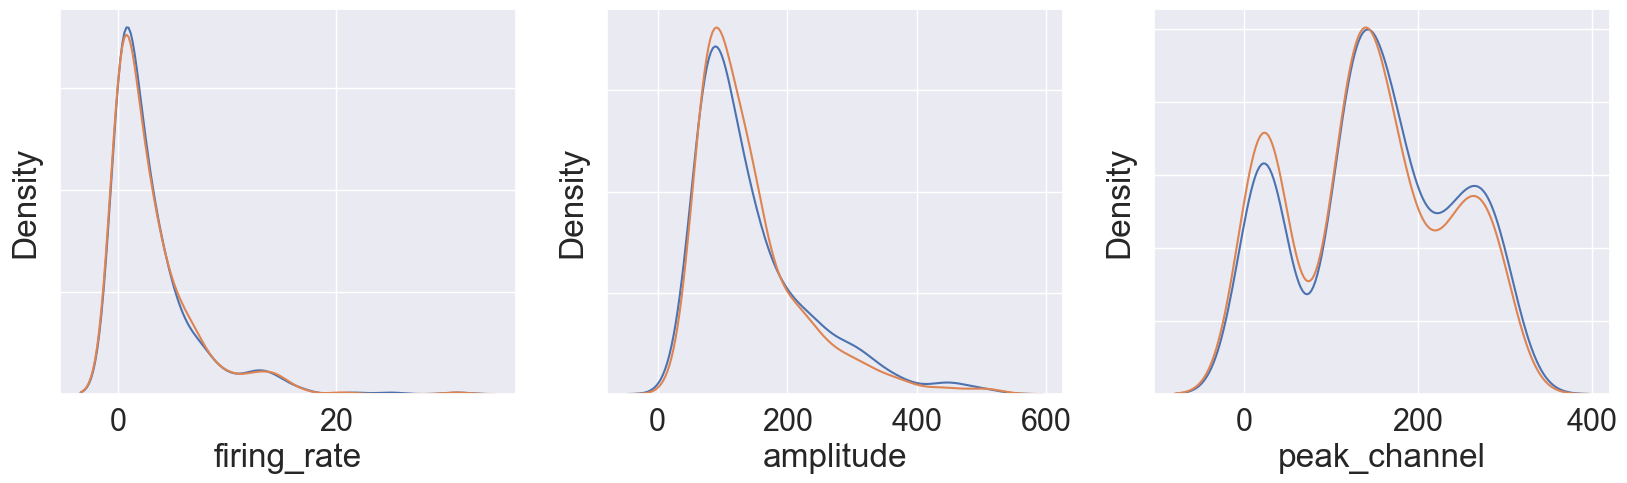

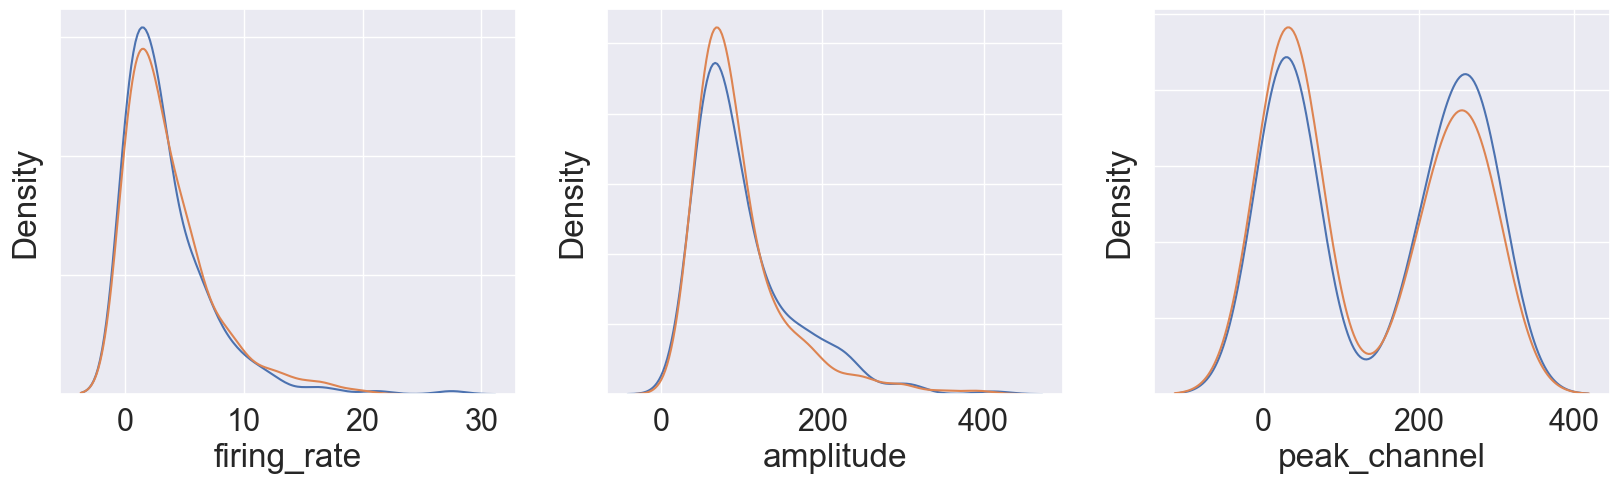

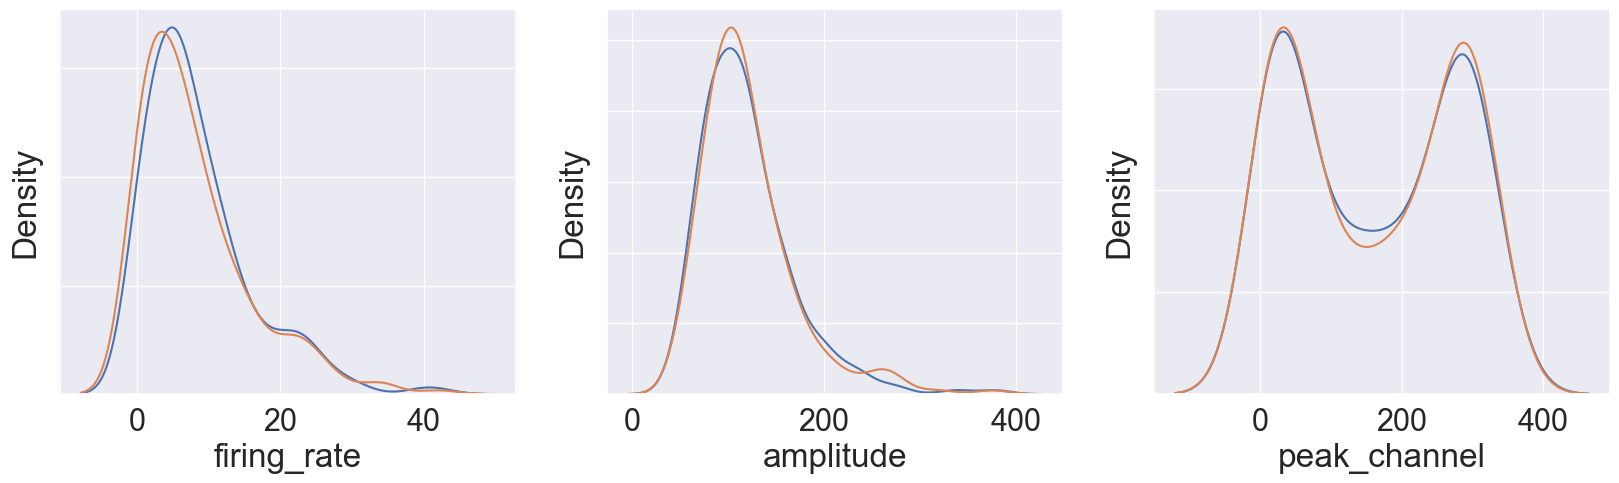

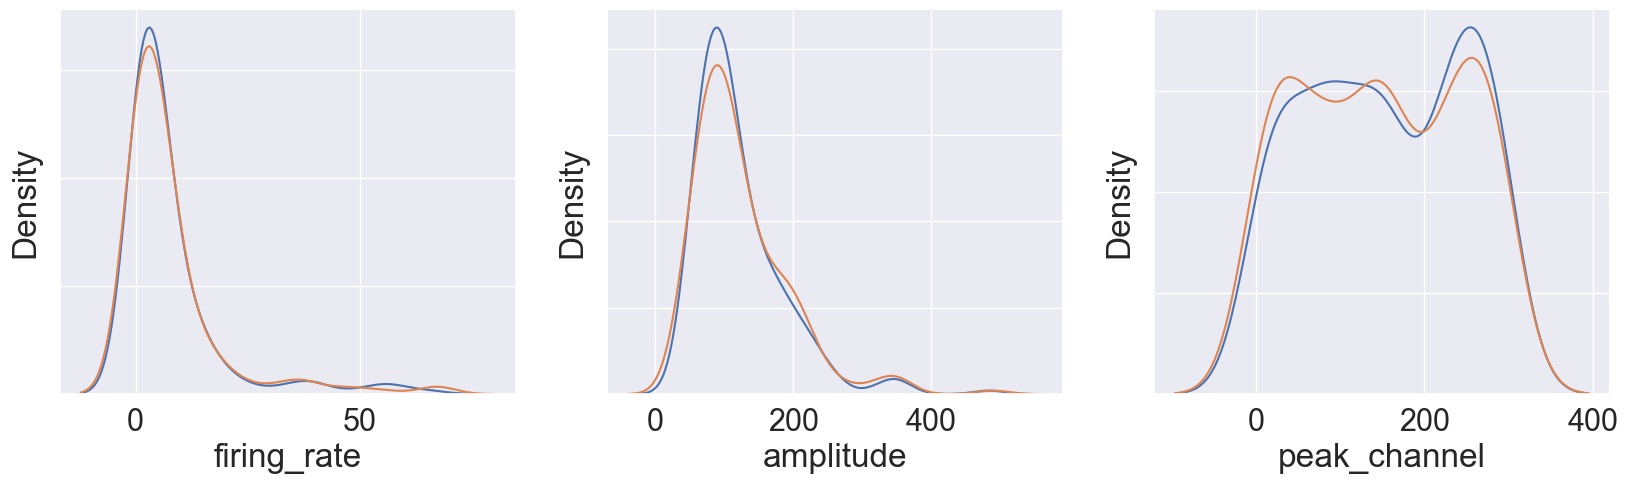

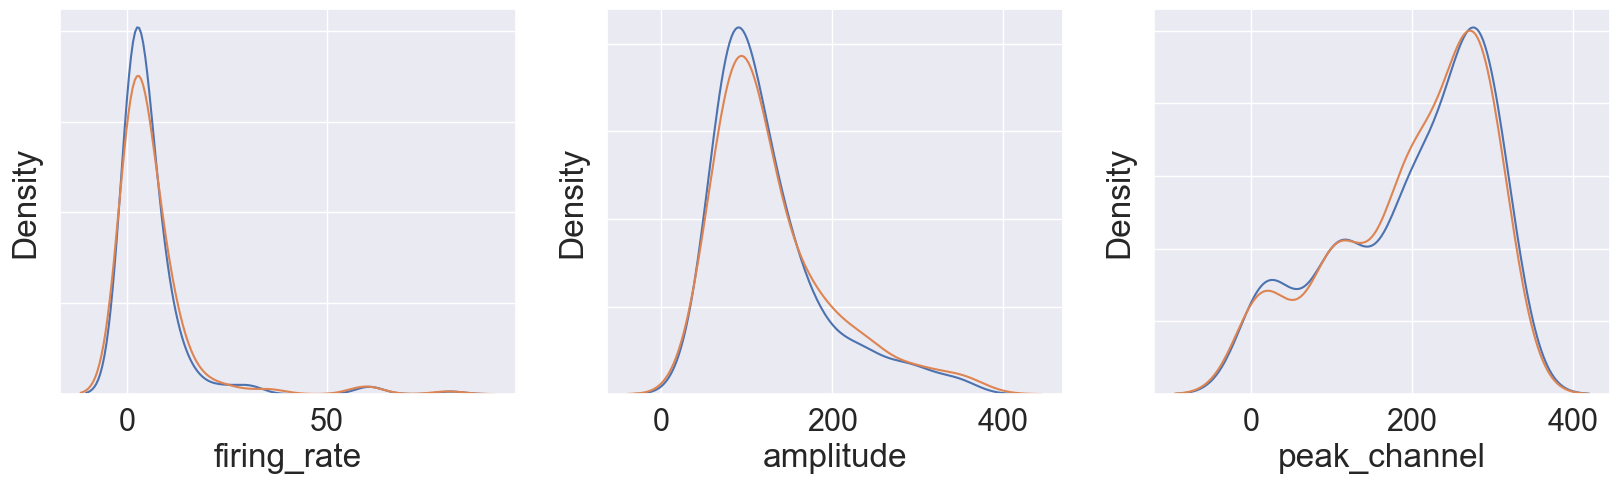

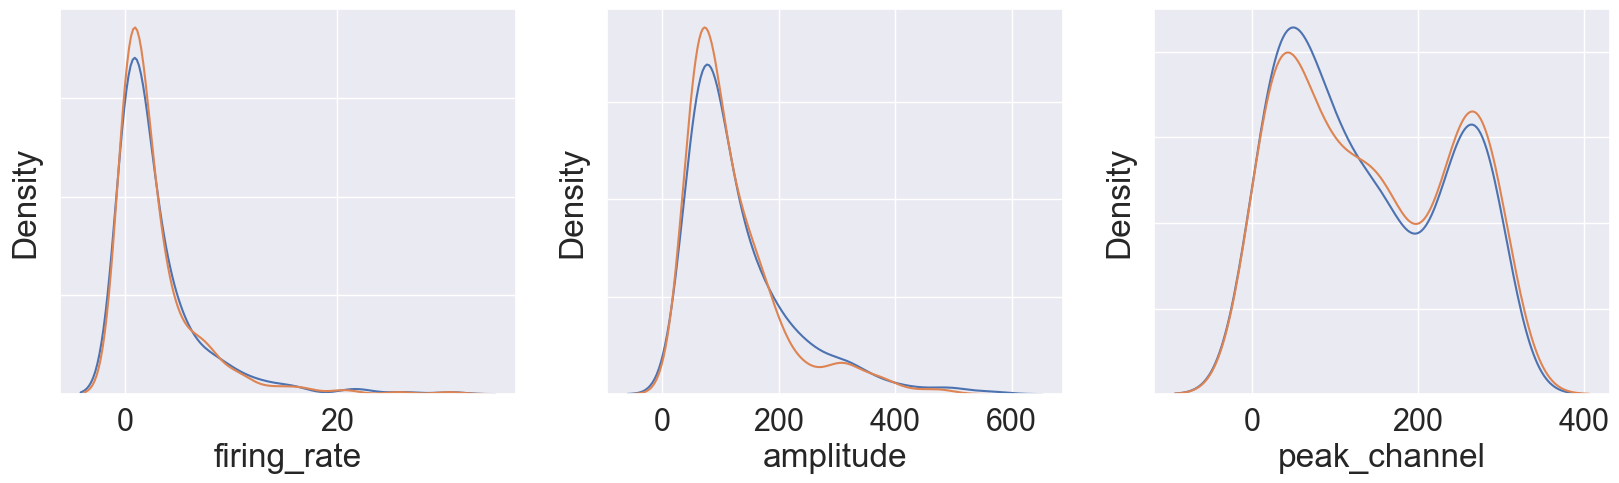

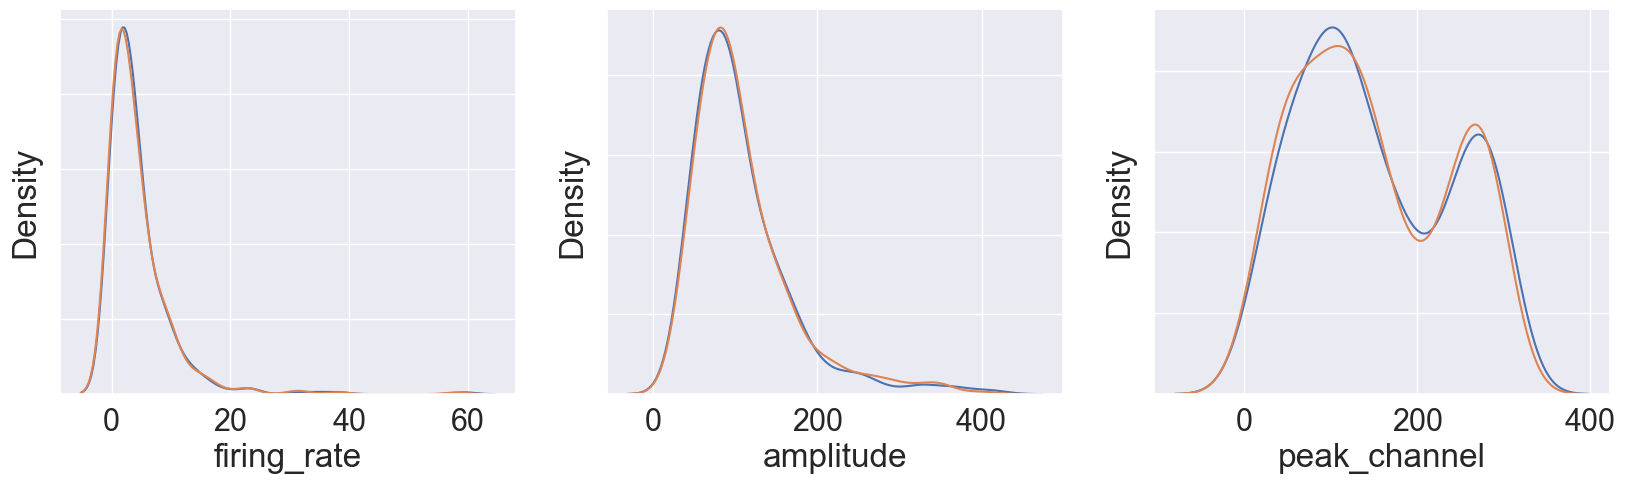

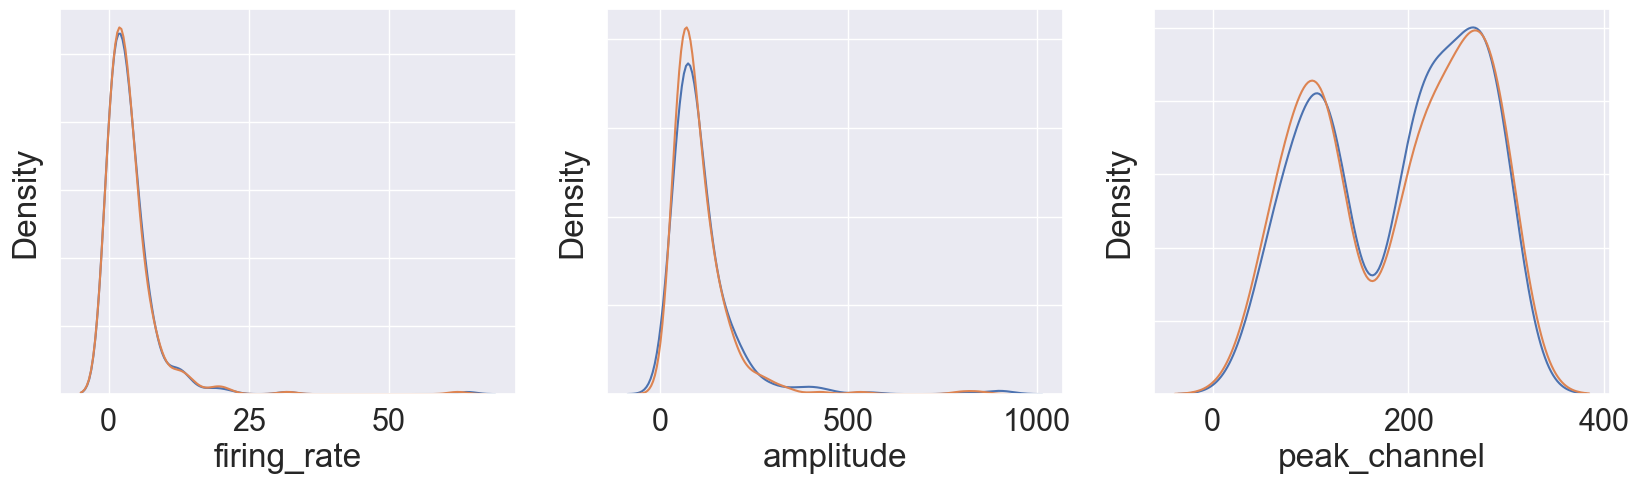

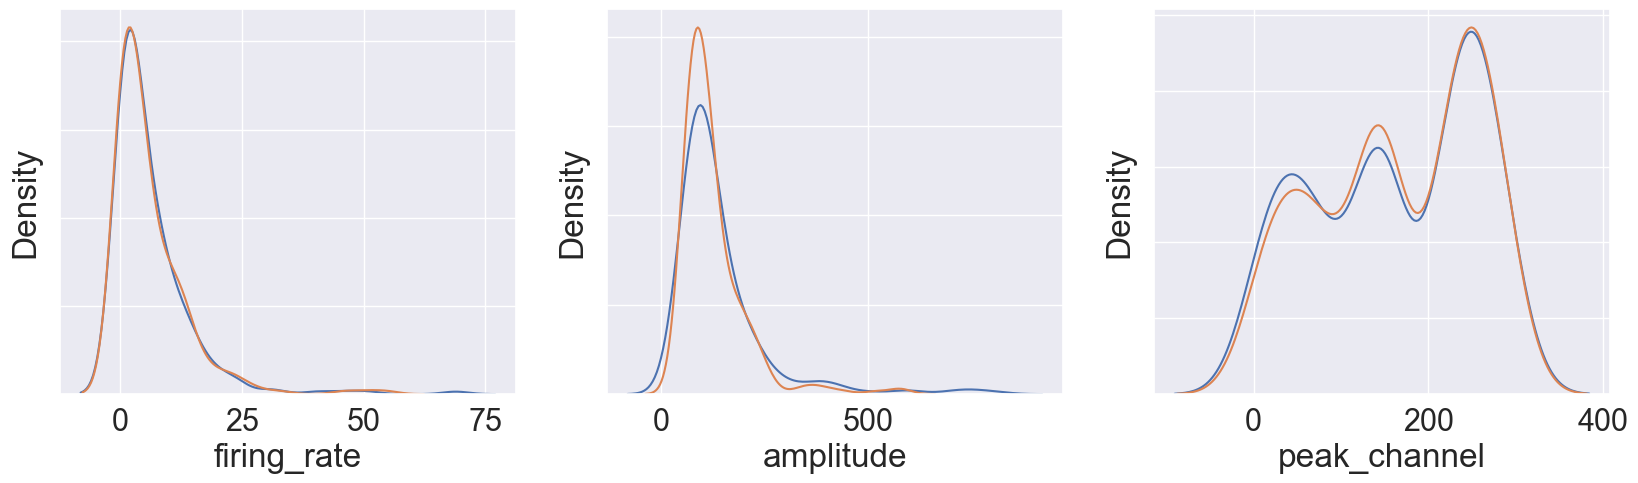

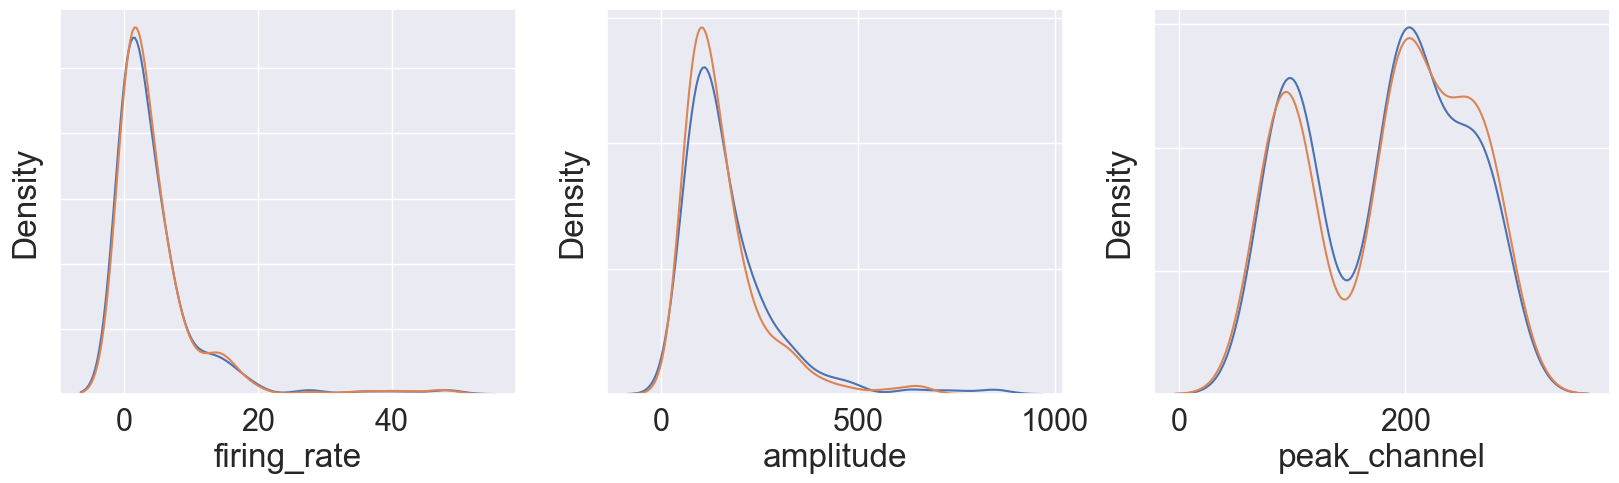

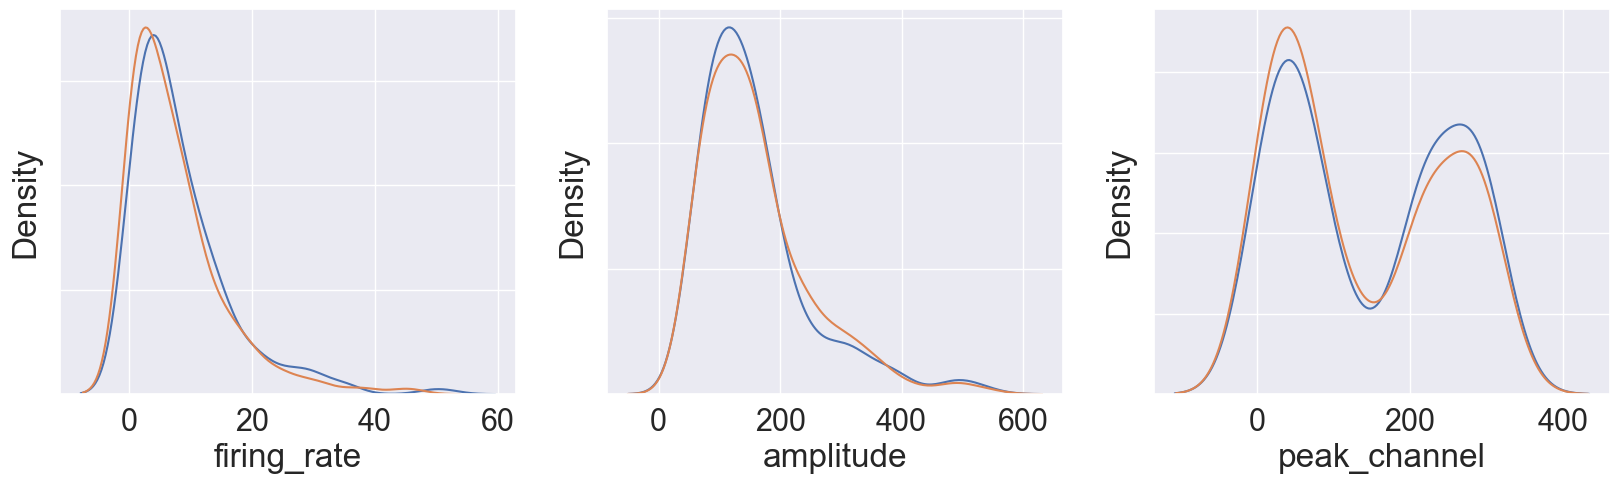

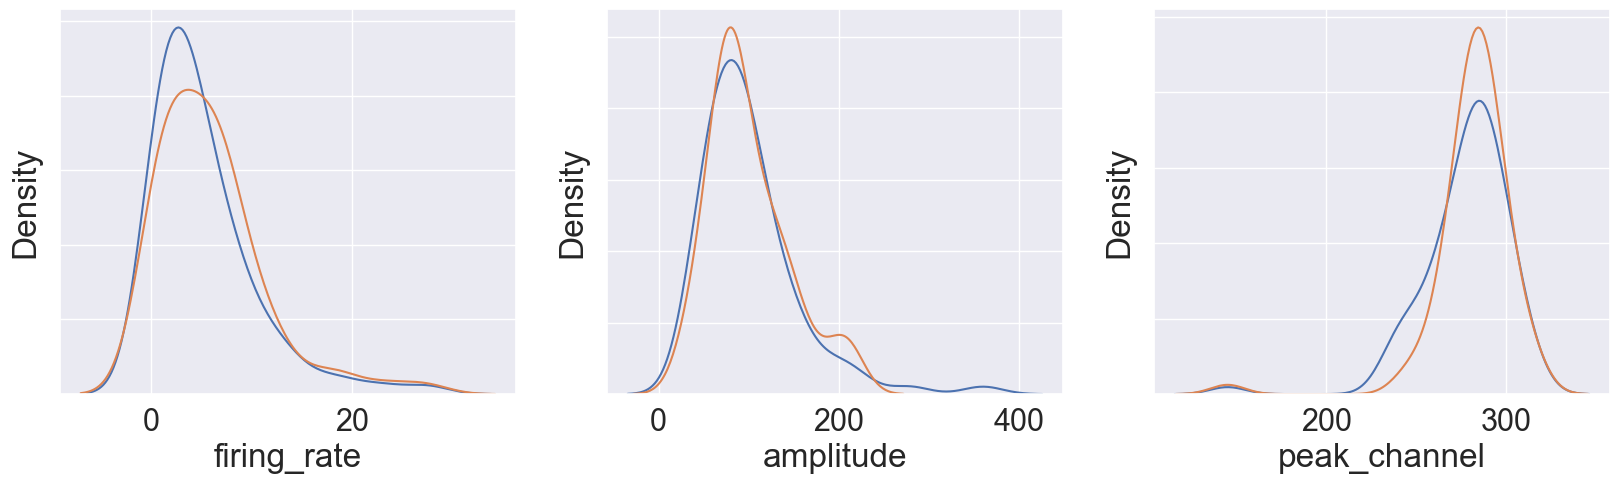

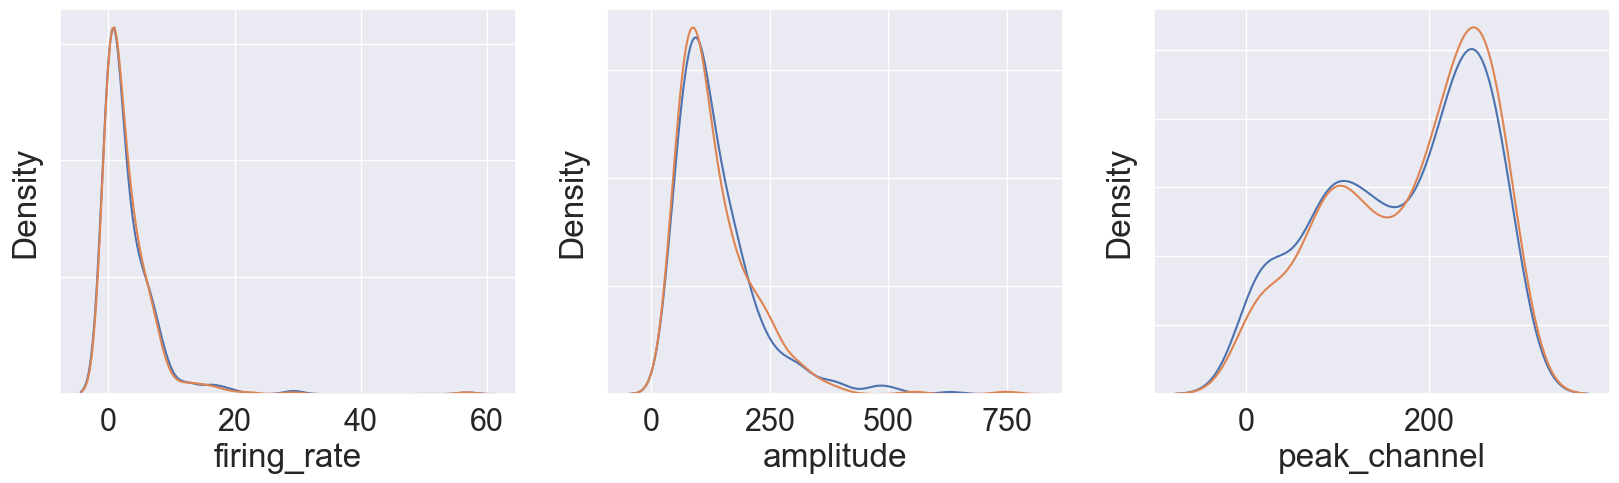

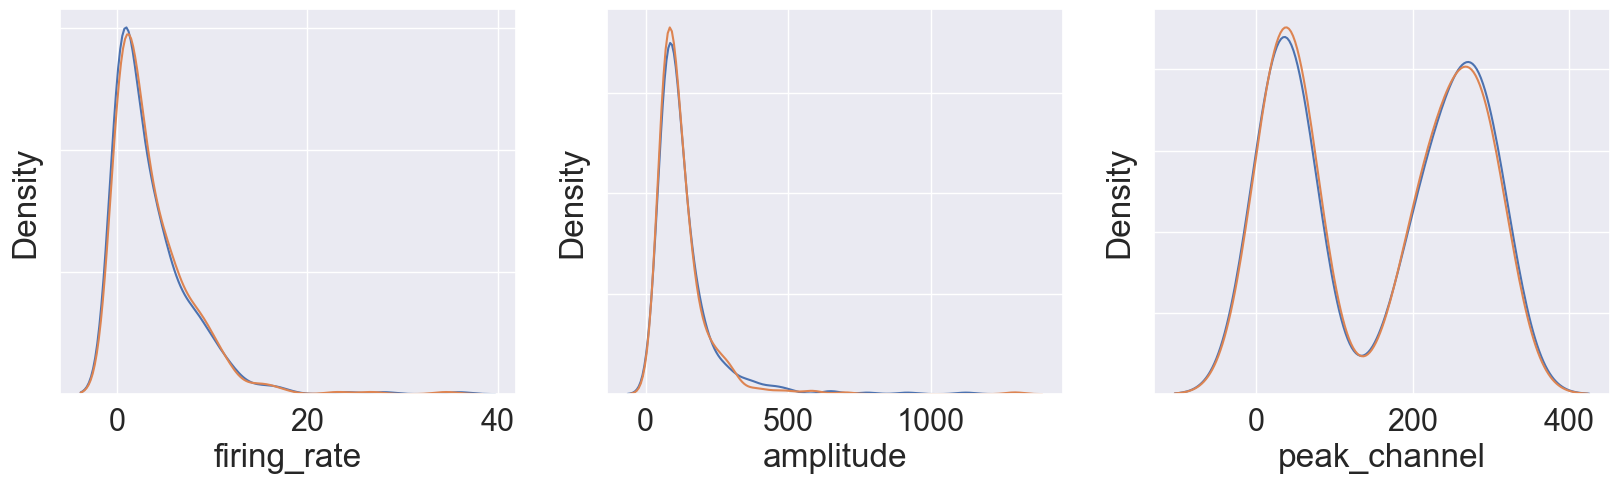

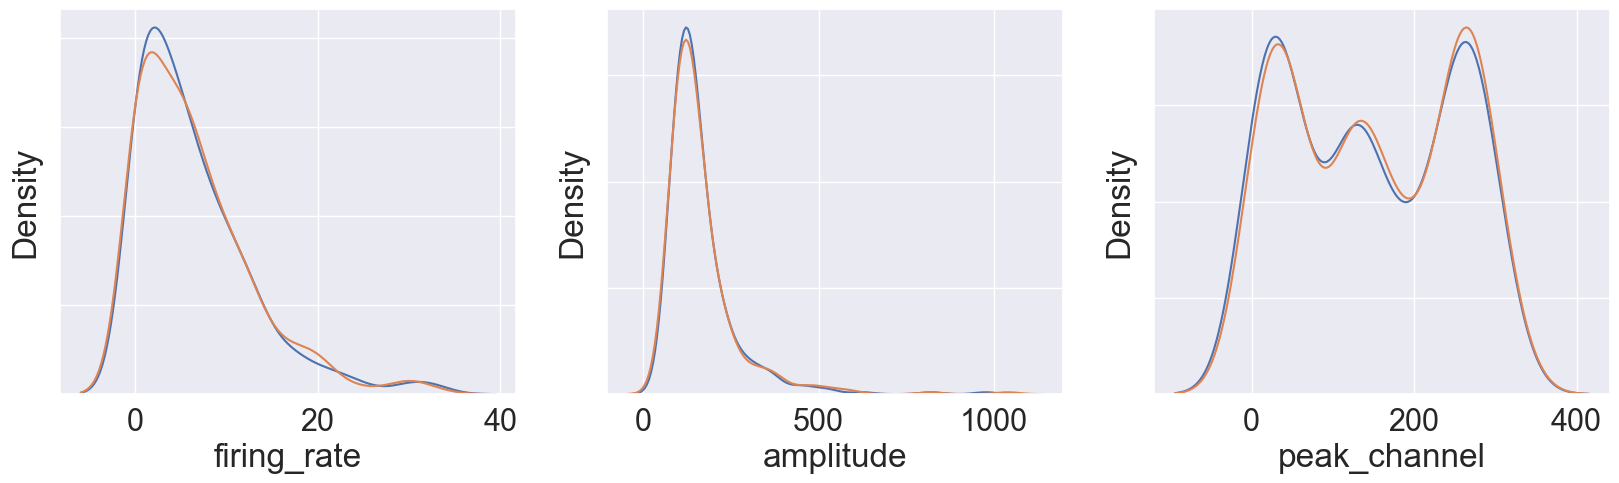

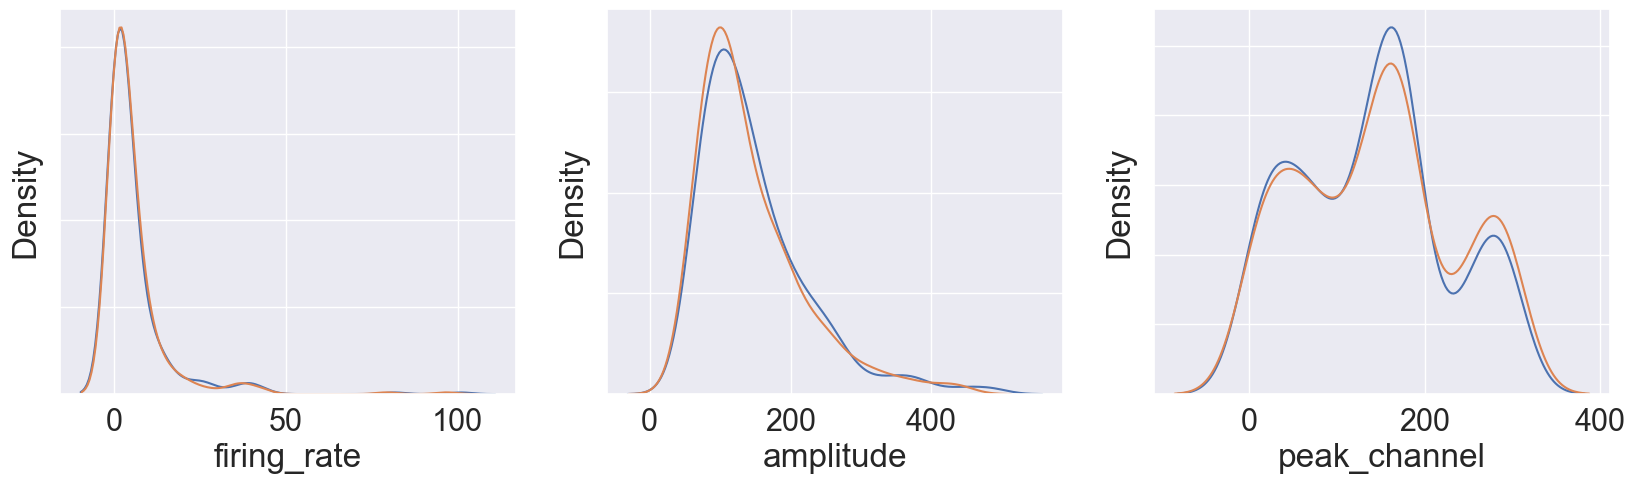

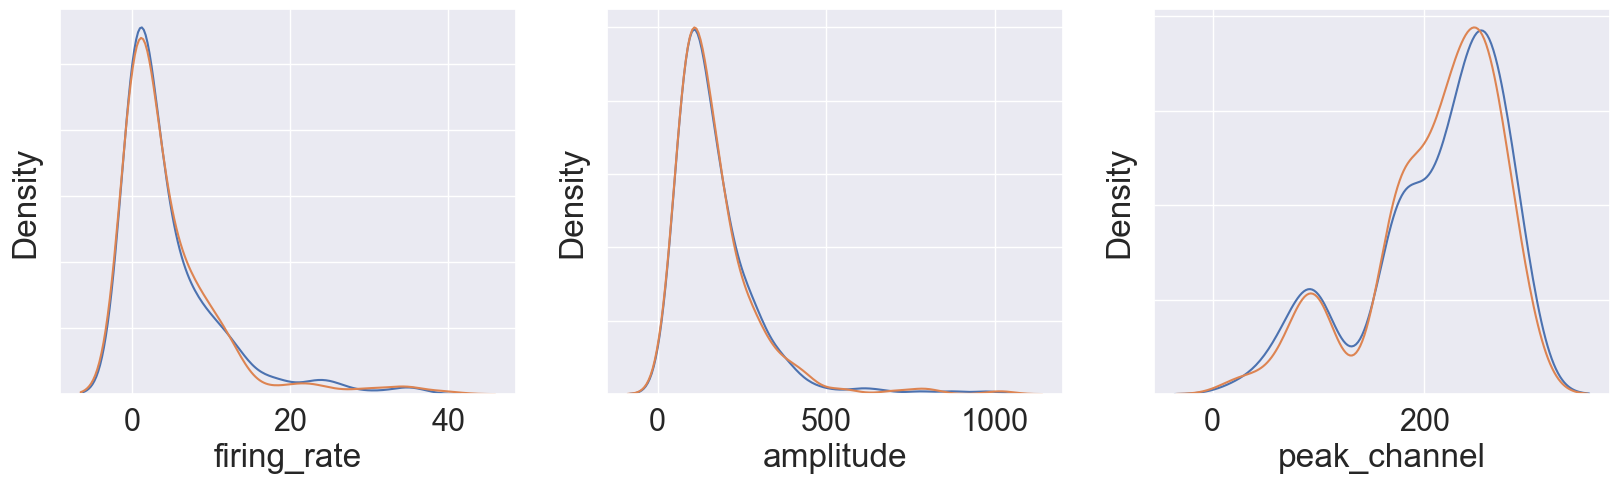

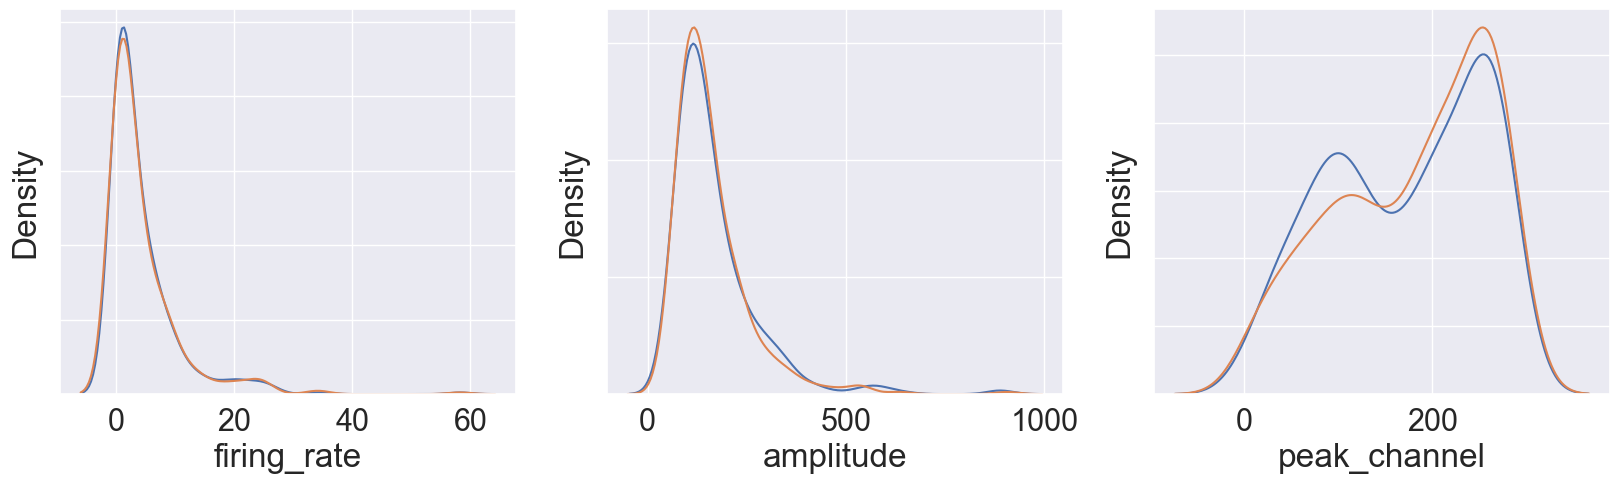

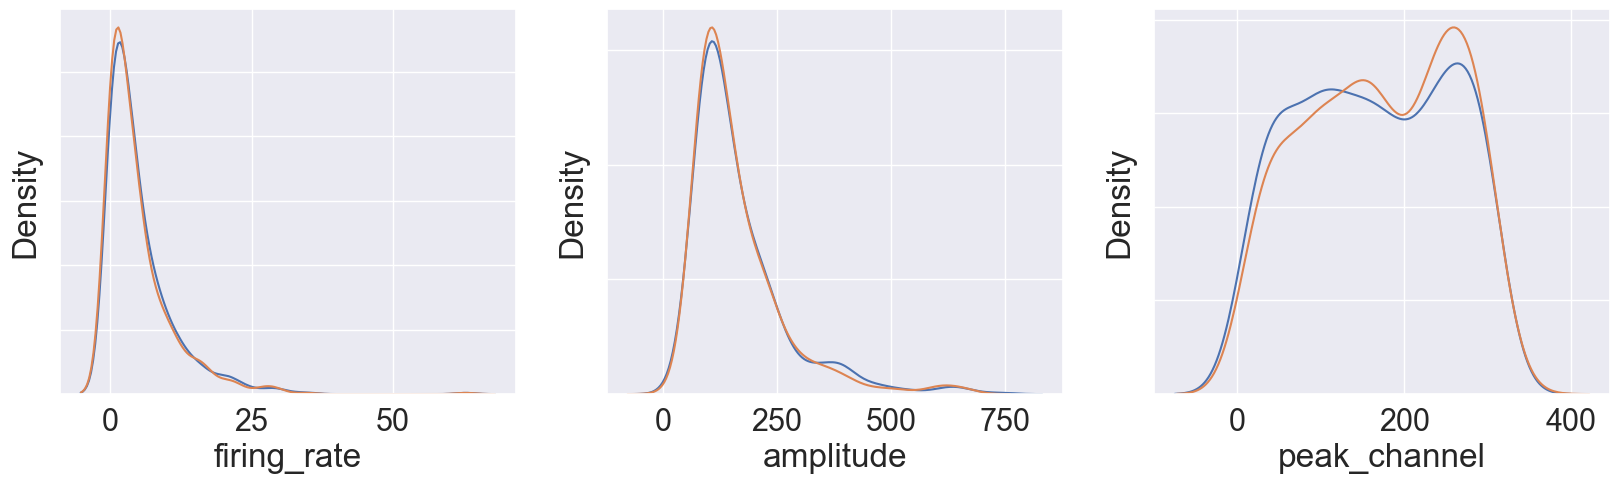

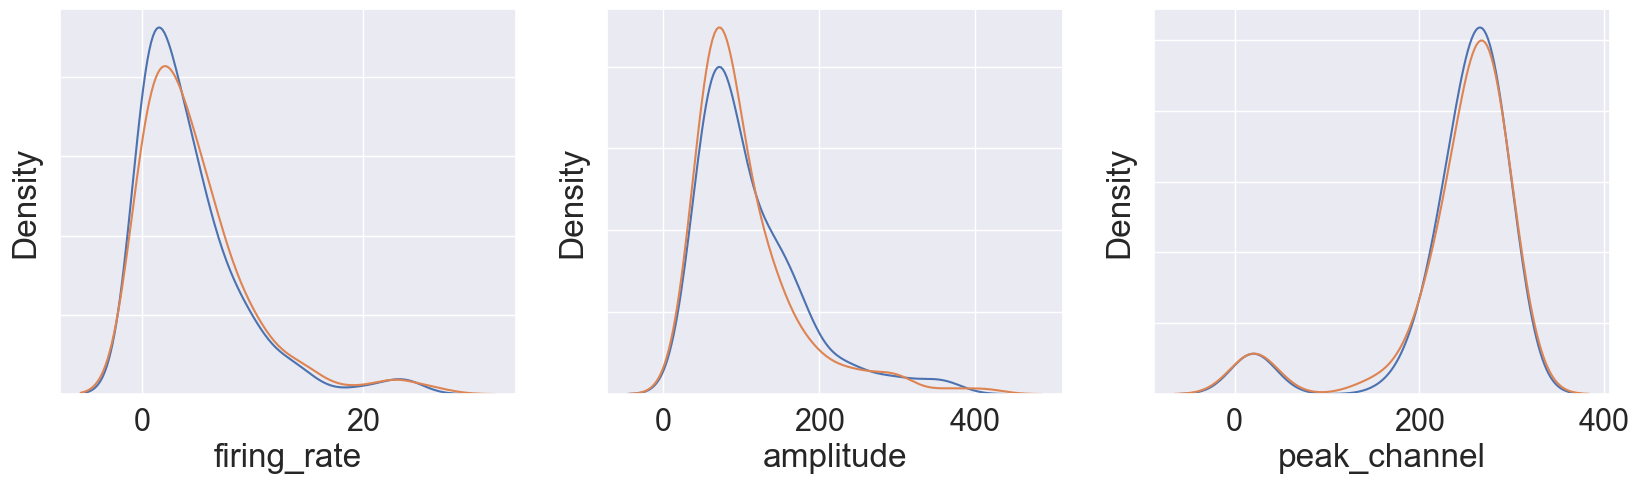

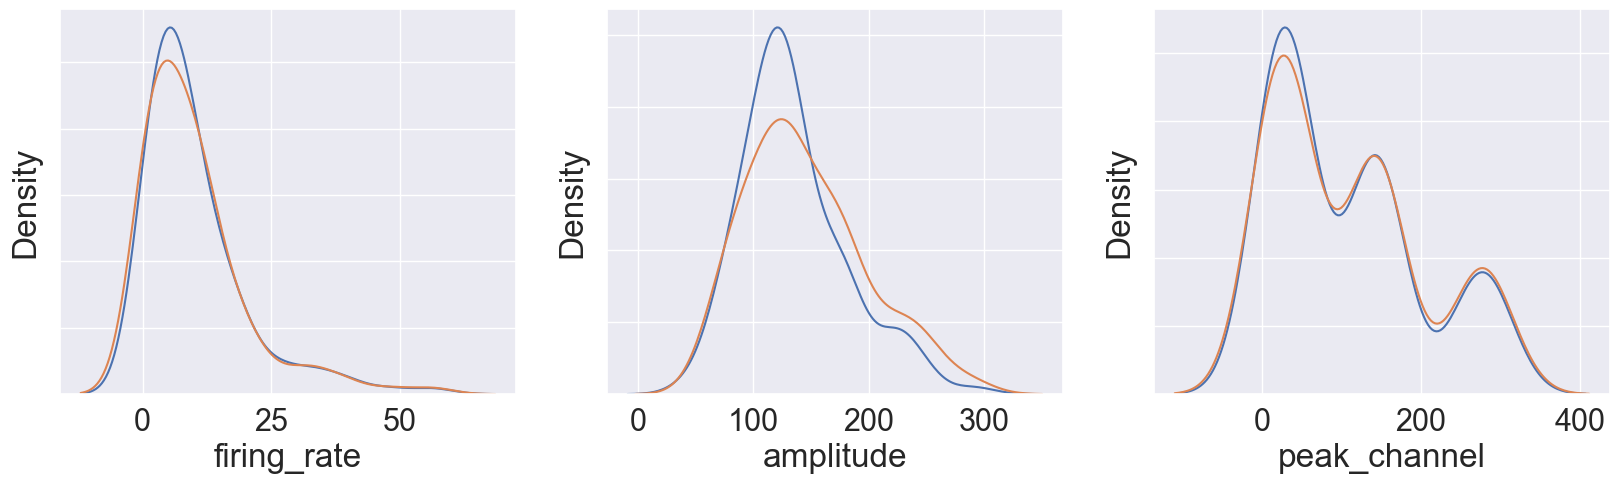

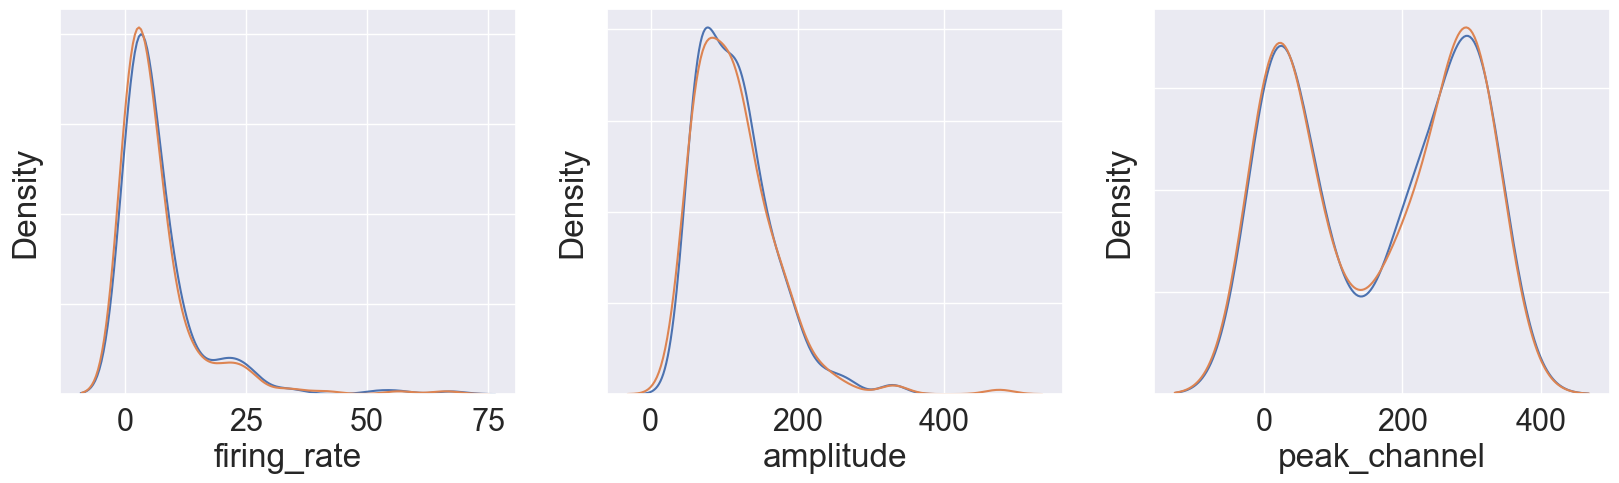

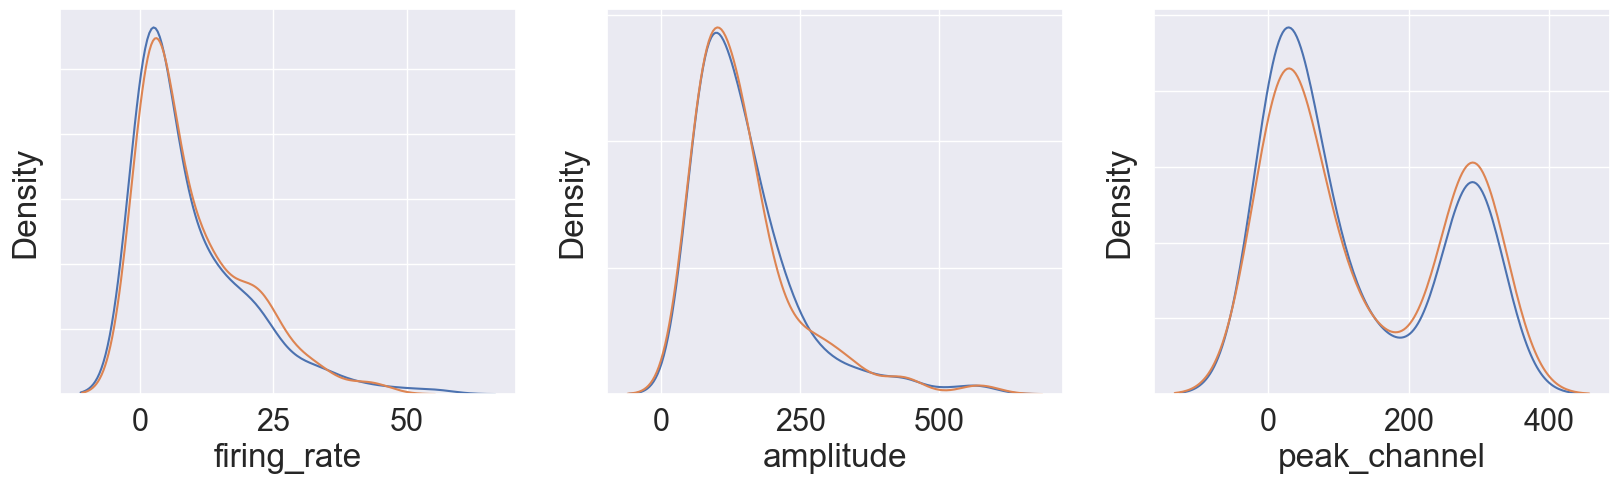

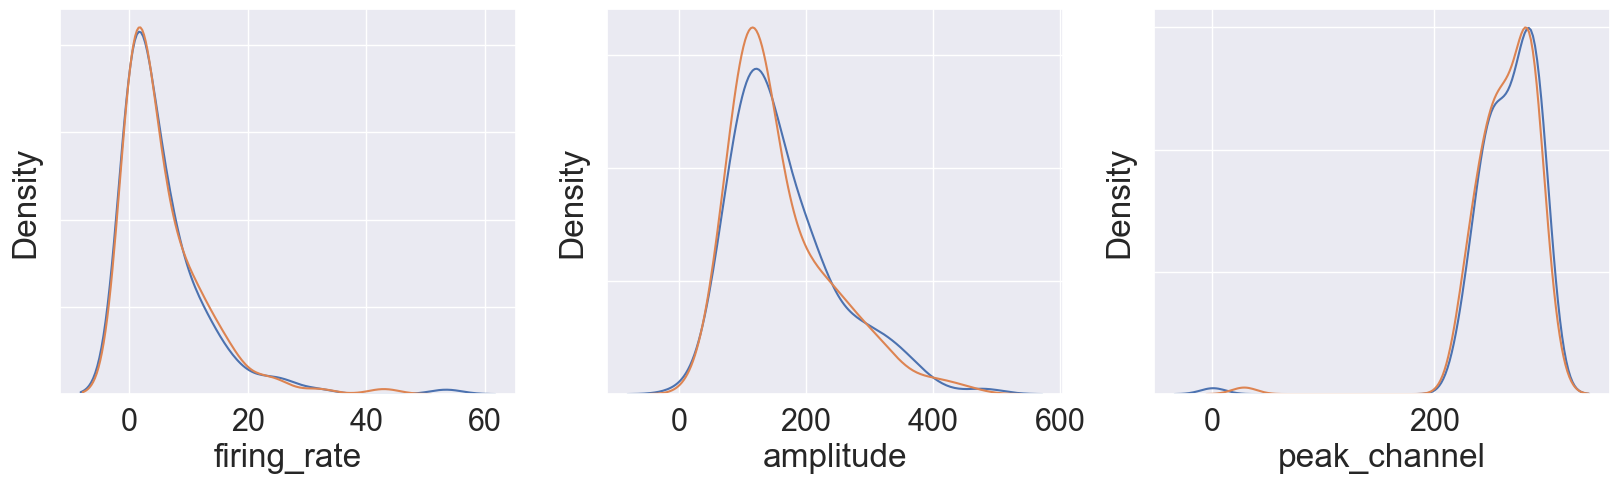

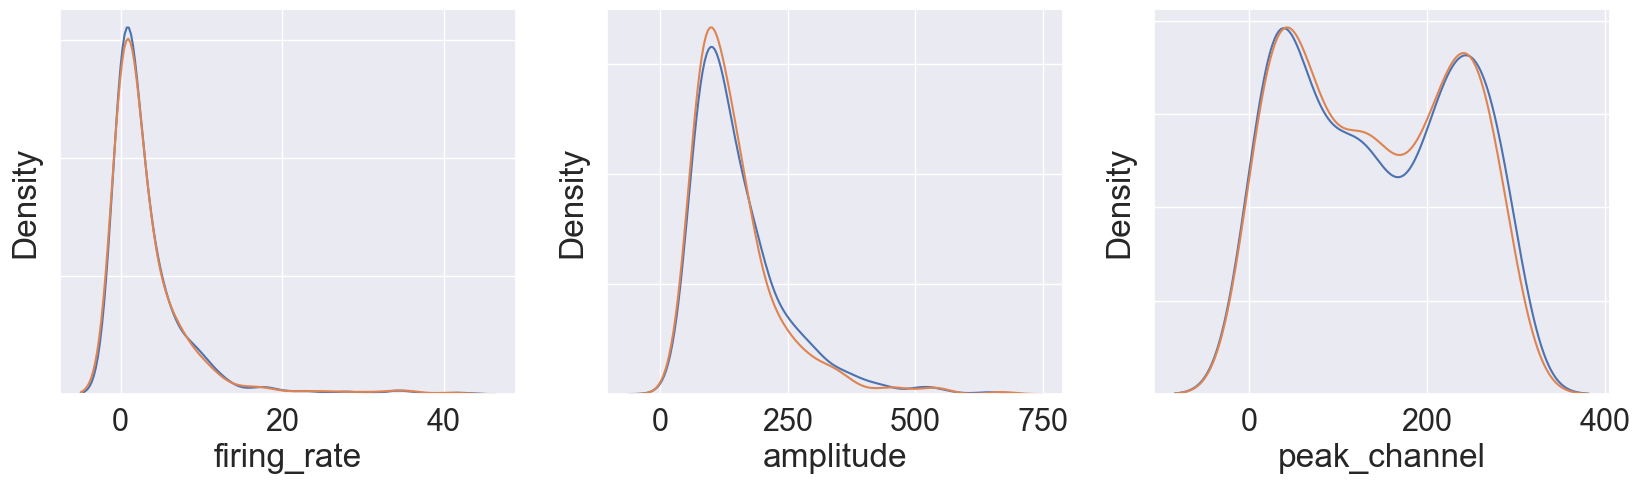

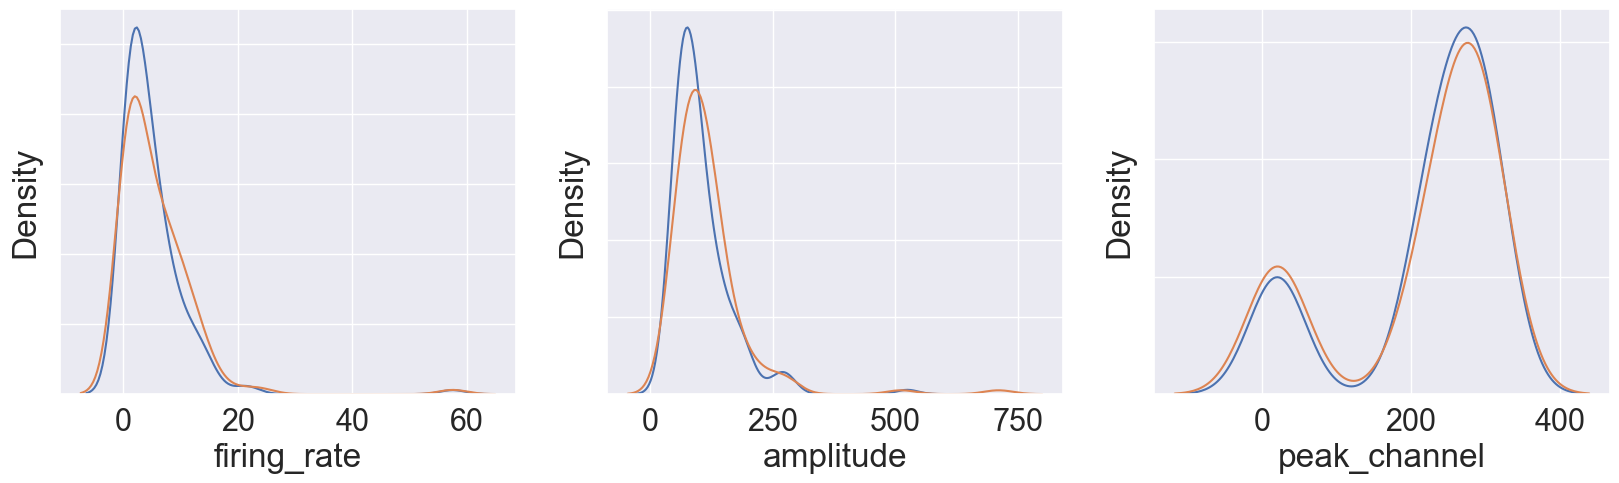

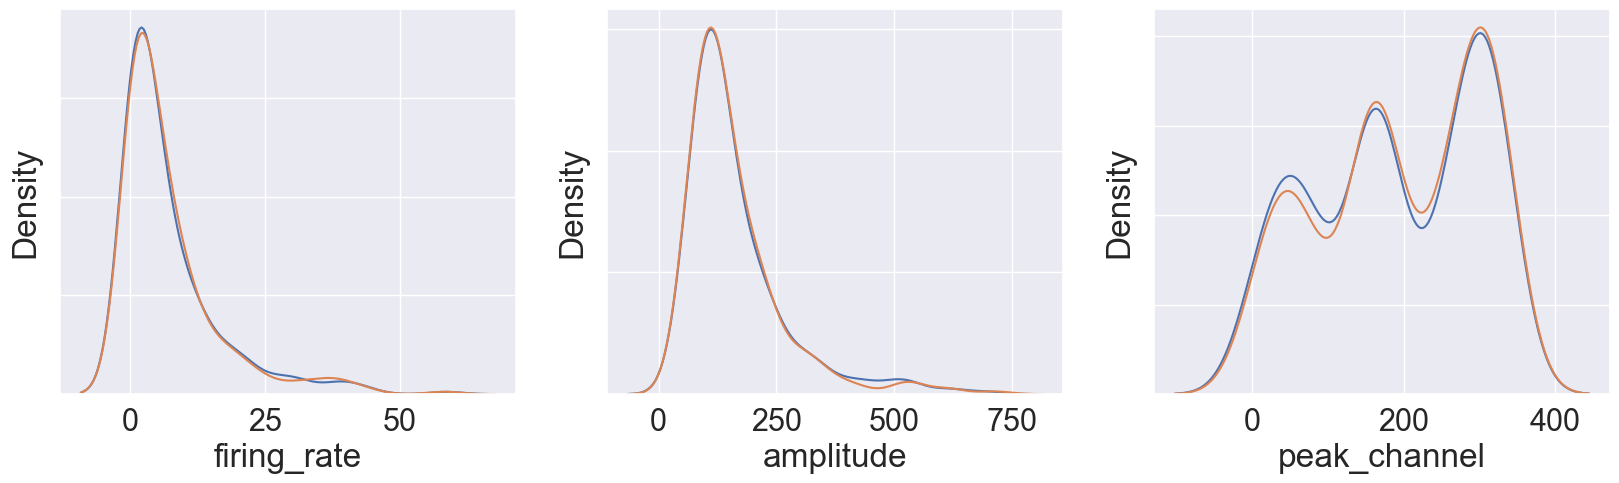

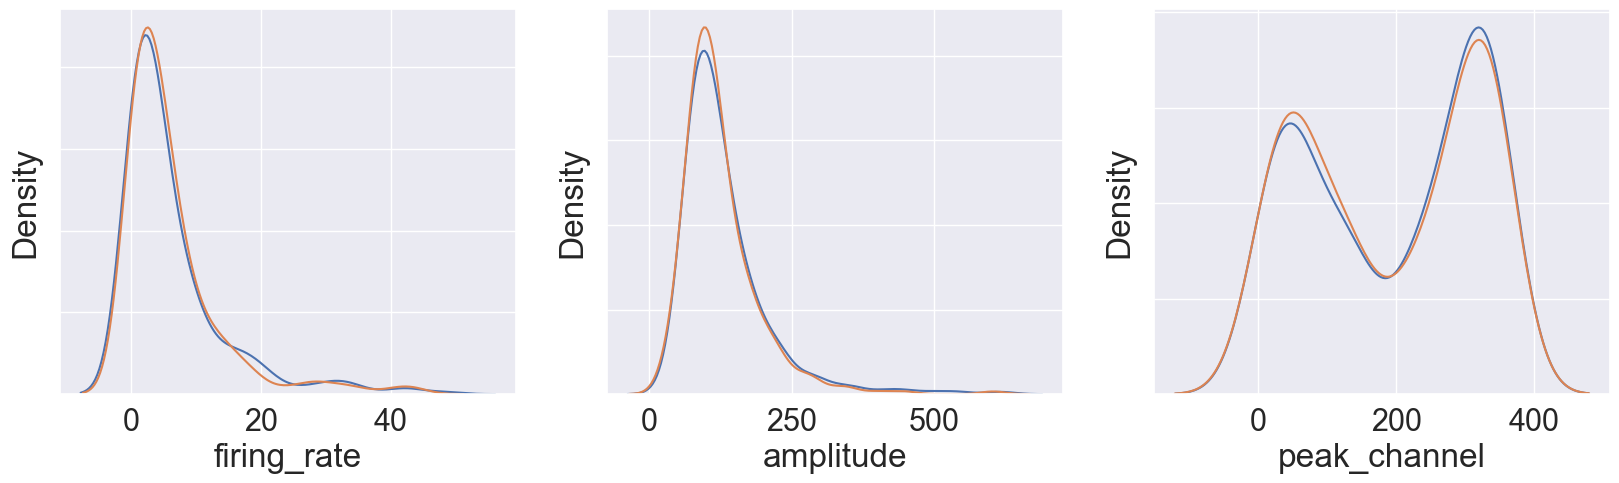

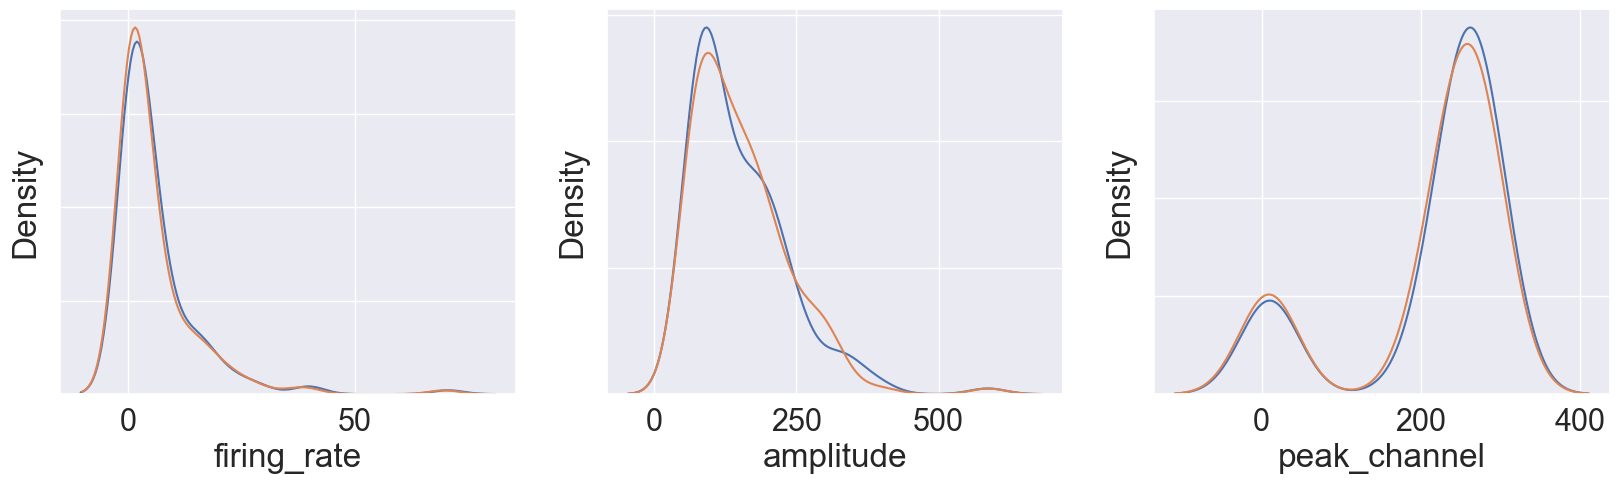

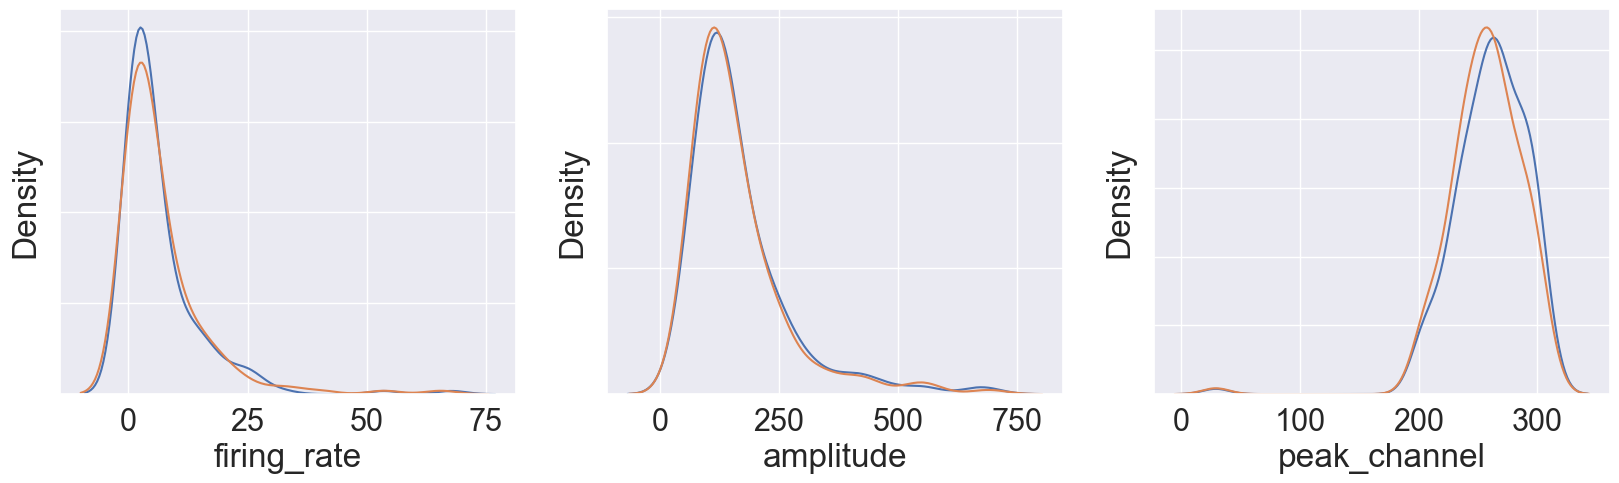

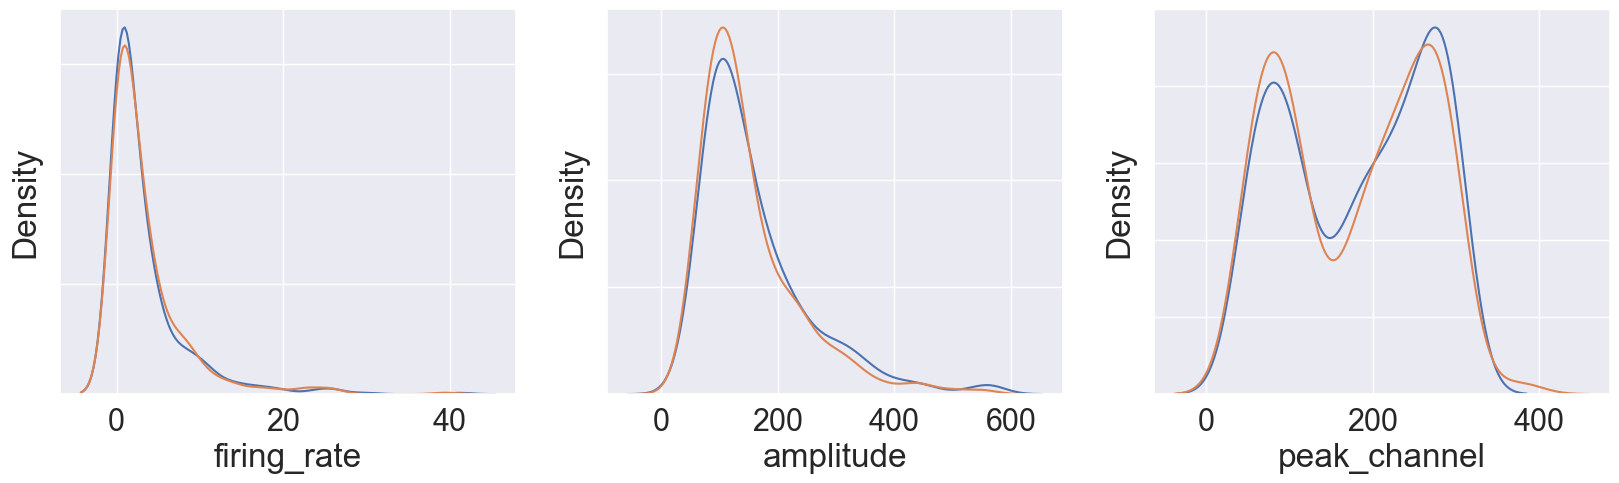

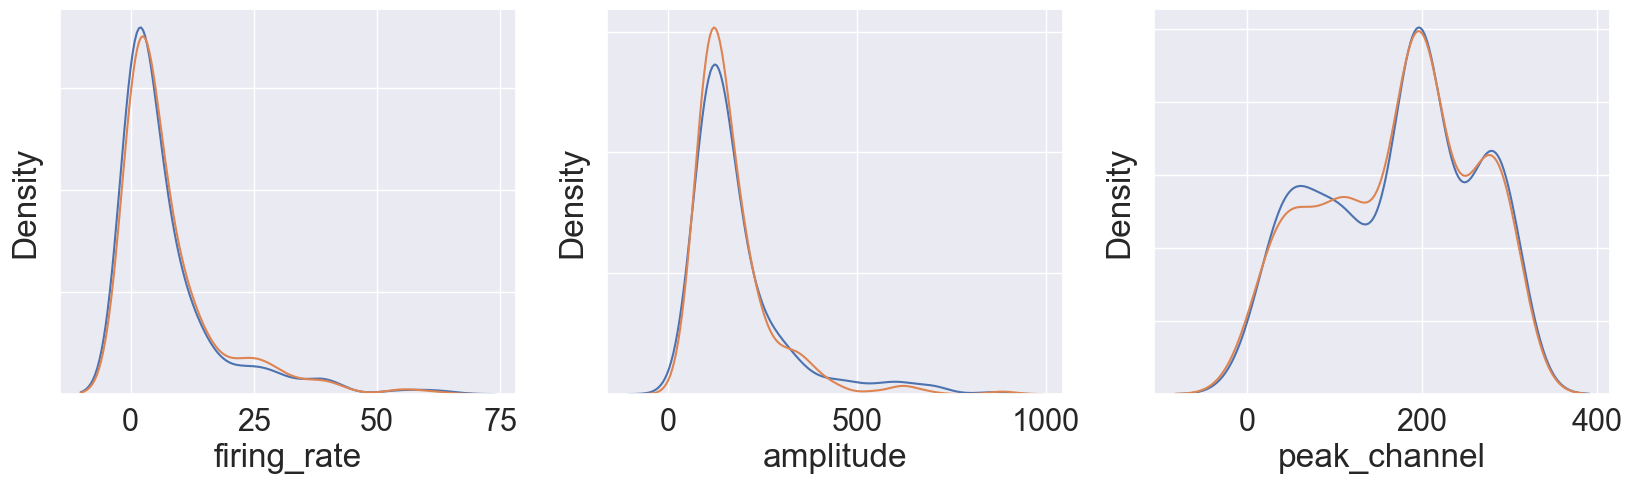

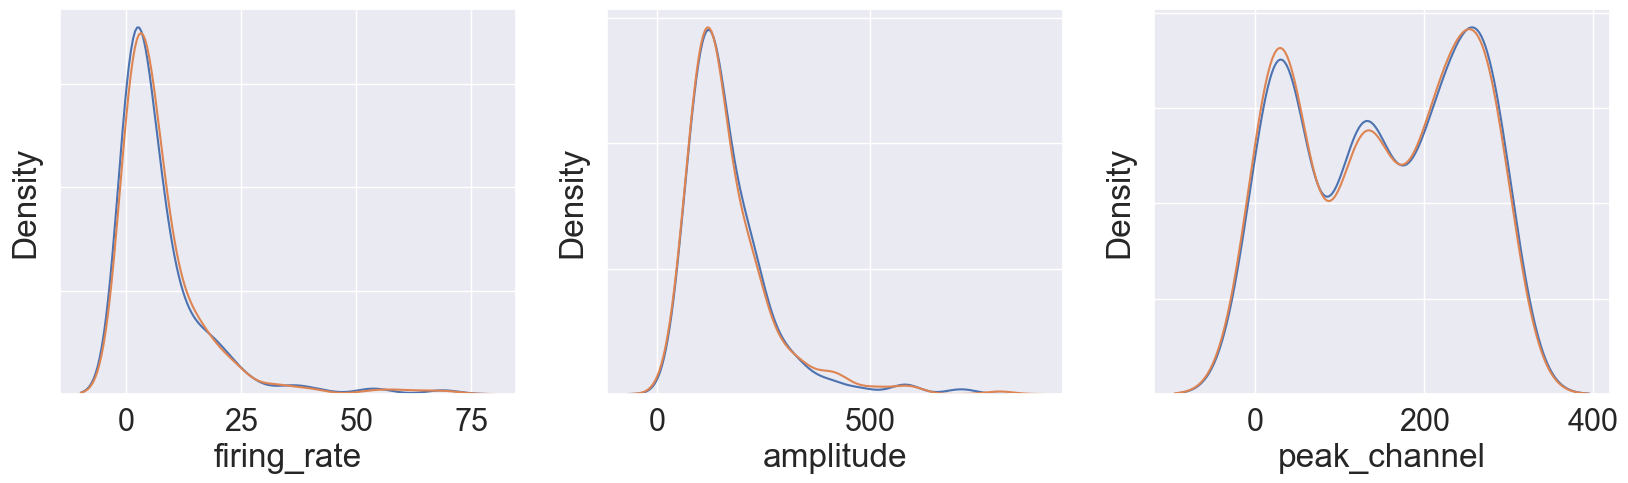

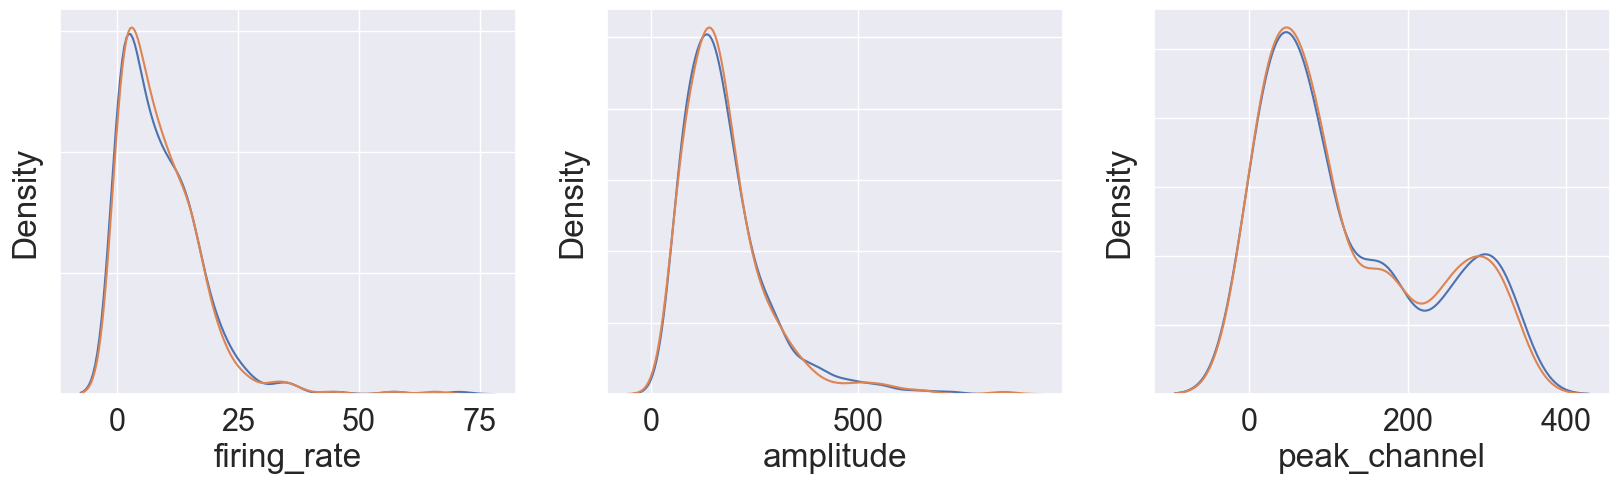

KeyError: "None of ['cluster_id'] are in the columns"

In [147]:
sns.set(font_scale=2)

metrics = ['firing_rate', 'amplitude', 'peak_channel']

palette = sns.color_palette()[:len(pair)]
palette_255 = [tuple(int(c*255) for c in col) for col in palette]

for pair in local_dj_probe_pairs():
    # skip if requirements for plot not met
    if any(
        not probe.metrics_csv.exists()
        or 'quality' not in probe.metrics_df.columns
        or all(probe.metrics_df['quality'] == 'noise')
        or len(probe.metrics_df.loc[probe.metrics_df['quality']=='good']) == 1
        for probe in pair.values()
    ):
        continue 
    
    # pring probe object/color key
    key = ''
    for rgb, probe in zip(palette_255, pair.values()):
        key += (
            f'<code style="color:rgb{rgb};">{probe.__repr__()}\n</code>'
        )
    display(IPython.display.HTML(key))    
    
    fig, axs = plt.subplots(
        ncols=len(metrics), 
        figsize=(20,5), 
    )
    
    for col, metric in enumerate(metrics):
        ax = axs[col]
        
        for pair_idx, probe_obj in enumerate(pair.values()):
            
            ax_rtn = probe_obj.plot_metric_good_units(
                metric,
                ax=ax,
                color=palette[pair_idx],
                )
            if ax_rtn is None:
                continue
            if col > 0:
                ax.set_ylabel('')
            if col == len(metrics)//2:
                ax.legend(probe_obj.__class__.__name__.split('Probe')[-1])
        if ax_rtn is None:
            continue
        
        ax.set(yticklabels=[])
            
    plt.show()

[2022-10-30 18:58:30,394][WARNING]: MySQL server has gone away. Reconnecting to the server.
c:\Users\ben.hardcastle\github\np_datajoint\comparisons.py:90: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


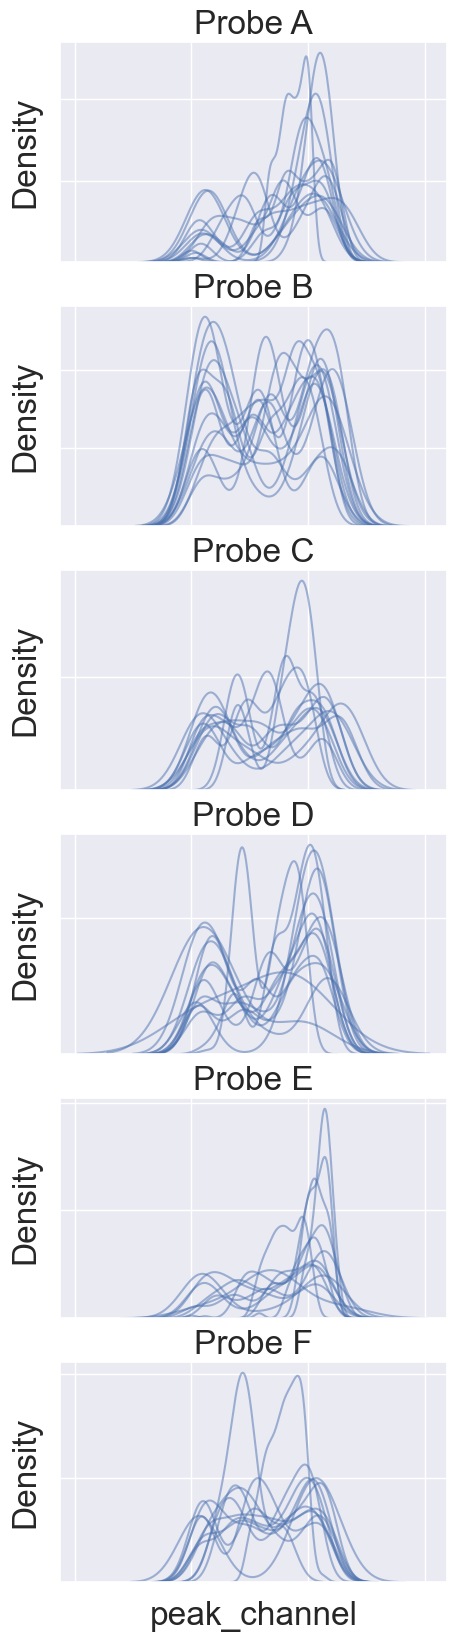

In [152]:
sns.set(font_scale=2)

fig, axs = plt.subplots(
    nrows=6, 
    figsize=(5,20),
    sharex=True,
)
for idx, ax in enumerate(axs):
    if idx < 5:
        ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set_title(f'Probe {chr(65+idx)}')
    
for pair in local_dj_probe_pairs():
    probe_obj = pair['local']
    if any(
        not probe.metrics_csv.exists()
        or 'quality' not in probe.metrics_df.columns
        or all(probe.metrics_df['quality'] == 'noise')
        or len(probe.metrics_df.loc[probe.metrics_df['quality']=='good']) == 1
        for probe in [probe_obj]
    ):
        continue 
            
    ax_rtn = probe_obj.plot_metric_good_units(
        'peak_channel',
        ax=axs[probe_obj.probe_index],
        color=sns.color_palette()[0],
        alpha=0.5,
        )

    # break